<a href="https://colab.research.google.com/github/jeppa1/Dados_Enem_Por_Escola/blob/main/An%C3%A1lise_de_Dados_Escolas_ENEM_RN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df_escolas_rn = pd.read_csv('escolas_rn_enem_gemini - escolas_rn.csv')
df_tratado = pd.read_csv('escolas_rn_enem_gemini - tratado.csv')
df_metadados = pd.read_csv('escolas_rn_enem_gemini - Metadados.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'escolas_rn_enem_gemini - escolas_rn.csv'

In [3]:
# Instala a biblioteca para interagir com o Google Sheets
!pip install gspread

# Importa as bibliotecas necessárias
import gspread
import pandas as pd
from google.colab import auth

In [6]:
# Autentica sua conta do Google no ambiente do Colab
auth.authenticate_user()

# Autoriza o gspread a usar as credenciais que você forneceu
import google.auth
creds, _ = google.auth.default()
gc = gspread.authorize(creds)

In [8]:
# Substitua "escolas_rn_enem_gemini" pelo nome exato da sua planilha no Google Sheets
try:
    nome_da_planilha = "escolas_rn_enem_gemini"
    spreadsheet = gc.open(nome_da_planilha) # CORREÇÃO AQUI

    # Carregando os dados das três abas
    # Aba 1: tratado
    worksheet_tratado = spreadsheet.worksheet("tratado")
    dados_tratados = worksheet_tratado.get_all_records()
    df_tratado = pd.DataFrame(dados_tratados)

    print("Aba 'tratado' carregada com sucesso!")
    display(df_tratado.head())

    # Aba 2: escolas_rn
    worksheet_escolas_rn = spreadsheet.worksheet("escolas_rn")
    dados_escolas_rn = worksheet_escolas_rn.get_all_records()
    df_escolas_rn = pd.DataFrame(dados_escolas_rn)

    print("\nAba 'escolas_rn' carregada com sucesso!")
    display(df_escolas_rn.head())

    # Aba 3: metadados
    worksheet_metadados = spreadsheet.worksheet("Metadados")
    dados_metadados = worksheet_metadados.get_all_records()
    df_metadados = pd.DataFrame(dados_metadados)

    print("\nAba 'Metadados' carregada com sucesso!")
    display(df_metadados.head())


except gspread.exceptions.SpreadsheetNotFound:
    print(f"Erro: A planilha '{nome_da_planilha}' não foi encontrada.")
    print("Verifique se o nome está correto e se você compartilhou a planilha com o e-mail de serviço ou tem as permissões corretas.")
except gspread.exceptions.WorksheetNotFound as e:
    print(f"Erro: {e}. Uma das abas não foi encontrada. Verifique se os nomes ('tratado', 'escolas_rn', 'Metadados') estão corretos em sua planilha.")

Aba 'tratado' carregada com sucesso!


ID    Q1  Codigo_UF  Q2  Codigo_Municipio            Q3  Codigo_Escola  \
0   1  2005         24  RN           2401107  Areia Branca       24000027   
1   2  2006         24  RN           2401107  Areia Branca       24000027   
2   3  2007         24  RN           2401107  Areia Branca       24000027   
3   4  2008         24  RN           2401107  Areia Branca       24000027   
4   5  2007         24  RN           2401107  Areia Branca       24000132   

                                         Nome_Escola        Q4      Q5  ...  \
0                 EE DESEM SILVERIO SOARES ENS MEDIO  Estadual  Urbana  ...   
1                 EE DESEM SILVERIO SOARES ENS MEDIO  Estadual  Urbana  ...   
2   E. E. DESEMBARGADOR SILVERIO SOARES ENSINO MEDIO  Estadual  Urbana  ...   
3  ESCOLA ESTADUAL DESEMBARGADOR SILVERIO SOARES ...  Estadual  Urbana  ...   
4               EE CONEGO ISMAR FERNANDES DE QUEIROZ  Estadual  Urbana  ...   

     Q13    Q14    Q15 Q16 Q17 Q18   Q19   Q20   Q21 Q22  
0                40.82              67.3   5.6  27.1   4  
1                39.24                                 4  
2                46.64              69.2   4.6  26.2   4  
3  56.11  32.71                     70.9   0.7  28.4   4  
4                47.37              77.8  11.1  11.1   1  

[5 rows x 28 columns]


Aba 'escolas_rn' carregada com sucesso!


NU_ANO  CO_UF_ESCOLA SG_UF_ESCOLA  CO_MUNICIPIO_ESCOLA NO_MUNICIPIO_ESCOLA  \
0    2005            24           RN              2401107        Areia Branca   
1    2006            24           RN              2401107        Areia Branca   
2    2007            24           RN              2401107        Areia Branca   
3    2008            24           RN              2401107        Areia Branca   
4    2007            24           RN              2401107        Areia Branca   

   CO_ESCOLA_EDUCACENSO                               NO_ESCOLA_EDUCACENSO  \
0              24000027                 EE DESEM SILVERIO SOARES ENS MEDIO   
1              24000027                 EE DESEM SILVERIO SOARES ENS MEDIO   
2              24000027   E. E. DESEMBARGADOR SILVERIO SOARES ENSINO MEDIO   
3              24000027  ESCOLA ESTADUAL DESEMBARGADOR SILVERIO SOARES ...   
4              24000132               EE CONEGO ISMAR FERNANDES DE QUEIROZ   

   TP_DEPENDENCIA_ADM_ESCOLA  TP_LOCALIZACAO_ESCOLA  NU_MATRICULAS  ...  \
0                          2                      1            227  ...   
1                          2                      1            202  ...   
2                          2                      1            176  ...   
3                          2                      1            213  ...   
4                          2                      1             10  ...   

  NU_MEDIA_RED  NU_MEDIA_OBJ NU_MEDIA_TOT INSE PC_FORMACAO_DOCENTE  \
0                                   40.82                            
1                                   39.24                            
2                                   46.64                            
3        56.11         32.71                                         
4                                   47.37                            

  NU_TAXA_PERMANENCIA NU_TAXA_APROVACAO NU_TAXA_REPROVACAO NU_TAXA_ABANDONO  \
0                                  67.3                5.6             27.1   
1                                                                             
2                                  69.2                4.6             26.2   
3                                  70.9                0.7             28.4   
4                                  77.8               11.1             11.1   

          PORTE_ESCOLA  
0  Maior que 90 alunos  
1  Maior que 90 alunos  
2  Maior que 90 alunos  
3  Maior que 90 alunos  
4     De 1 a 30 alunos  

[5 rows x 27 columns]


Aba 'Metadados' carregada com sucesso!


Código            Nome da Variável  \
0     Q1                         Ano   
1     Q2                          UF   
2     Q3                   Municipio   
3     Q4  Dependencia_Administrativa   
4     Q5          Localizacao_Escola   

                                      Descrição  \
0              Ano da edição do ENEM por Escola   
1       Sigla da Unidade da Federação da escola   
2                   Nome do município da escola   
3  Tipo da dependência administrativa da escola   
4                 Tipo de Localização da escola   

                        Codificação / Observação  
0                                              –  
1                                         Ex: RN  
2                                              –  
3  1=Federal, 2=Estadual, 3=Municipal, 4=Privada  
4                              1=Urbana, 2=Rural

In [9]:
# Mostra um resumo técnico do DataFrame df_tratado
print("### Informações sobre o DataFrame 'df_tratado' ###")
df_tratado.info()

### Informações sobre o DataFrame 'df_tratado' ###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3049 entries, 0 to 3048
Data columns (total 28 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   ID                                    3049 non-null   int64 
 1   Q1                                    3049 non-null   int64 
 2   Codigo_UF                             3049 non-null   int64 
 3   Q2                                    3049 non-null   object
 4   Codigo_Municipio                      3049 non-null   int64 
 5   Q3                                    3049 non-null   object
 6   Codigo_Escola                         3049 non-null   int64 
 7   Nome_Escola                           3049 non-null   object
 8   Q4                                    3049 non-null   object
 9   Q5                                    3049 non-null   object
 10  Q6                                    3049 no

In [10]:
# Criando o dicionário de renomeação a partir do DataFrame de metadados
# Ele vai mapear o que está na coluna 'Código' para o que está na 'Nome da Variável'
try:
    mapa_de_nomes = pd.Series(df_metadados['Nome da Variável'].values, index=df_metadados['Código']).to_dict()

    # Renomeando as colunas do df_tratado
    df_tratado.rename(columns=mapa_de_nomes, inplace=True)

    print("### Colunas renomeadas com sucesso! ###")

    # Vamos verificar o resultado com .info() novamente
    # Agora os nomes das colunas devem estar descritivos
    df_tratado.info()

except KeyError:
    print("Erro: Não foi possível encontrar as colunas 'Código' ou 'Nome da Variável' no seu arquivo de Metadados.")
    print("Por favor, verifique os nomes das colunas no df_metadados com o comando: df_metadados.head()")

### Colunas renomeadas com sucesso! ###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3049 entries, 0 to 3048
Data columns (total 28 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   ID                                    3049 non-null   int64 
 1   Ano                                   3049 non-null   int64 
 2   Codigo_UF                             3049 non-null   int64 
 3   UF                                    3049 non-null   object
 4   Codigo_Municipio                      3049 non-null   int64 
 5   Municipio                             3049 non-null   object
 6   Codigo_Escola                         3049 non-null   int64 
 7   Nome_Escola                           3049 non-null   object
 8   Dependencia_Administrativa            3049 non-null   object
 9   Localizacao_Escola                    3049 non-null   object
 10  Matriculas                            3049 non-null   in

In [11]:
# Lista das colunas que deveriam ser numéricas, agora com os nomes corretos
colunas_para_converter = [
    'Taxa_Participacao', 'Media_Ciencias_Natureza', 'Media_Ciencias_Humanas',
    'Media_Linguagens_Codigos', 'Media_Matematica', 'Media_Redacao',
    'Media_Prova_Objetiva', 'Media_Total', 'Indice_Status_Educacional',
    'Percentual_Formacao_Docente', 'Taxa_Permanencia', 'Taxa_Aprovacao',
    'Taxa_Reprovacao', 'Taxa_Abandono'
]

print("Iniciando conversão de tipos de dados...")

# Loop para tratar cada coluna
for coluna in colunas_para_converter:
    if coluna in df_tratado.columns:
        if pd.api.types.is_numeric_dtype(df_tratado[coluna]):
            print(f"Coluna '{coluna}' já é numérica. Pulando.")
            continue
        print(f"Tratando coluna: '{coluna}'")
        df_tratado[coluna] = pd.to_numeric(df_tratado[coluna].astype(str).str.replace(',', '.'), errors='coerce')
    else:
        print(f"Atenção: Coluna '{coluna}' não encontrada no DataFrame.")

print("\nConversão finalizada!")

print("\n### Verificando os tipos de dados após o tratamento ###")
df_tratado.info()

Iniciando conversão de tipos de dados...
Tratando coluna: 'Taxa_Participacao'
Tratando coluna: 'Media_Ciencias_Natureza'
Tratando coluna: 'Media_Ciencias_Humanas'
Tratando coluna: 'Media_Linguagens_Codigos'
Tratando coluna: 'Media_Matematica'
Tratando coluna: 'Media_Redacao'
Tratando coluna: 'Media_Prova_Objetiva'
Tratando coluna: 'Media_Total'
Tratando coluna: 'Indice_Status_Educacional'
Tratando coluna: 'Percentual_Formacao_Docente'
Tratando coluna: 'Taxa_Permanencia'
Tratando coluna: 'Taxa_Aprovacao'
Tratando coluna: 'Taxa_Reprovacao'
Tratando coluna: 'Taxa_Abandono'

Conversão finalizada!

### Verificando os tipos de dados após o tratamento ###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3049 entries, 0 to 3048
Data columns (total 28 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   ID                                    3049 non-null   int64  
 1   Ano                           

In [12]:
# Calcula o percentual de valores ausentes para cada coluna
percentual_ausentes = (df_tratado.isnull().sum() / len(df_tratado)) * 100

# Cria um DataFrame para melhor visualização e ordena do maior para o menor
df_ausentes = pd.DataFrame({'coluna': df_tratado.columns, 'percentual_ausente': percentual_ausentes})
df_ausentes = df_ausentes.sort_values(by='percentual_ausente', ascending=False)

print("Percentual de dados ausentes por coluna:")
display(df_ausentes[df_ausentes['percentual_ausente'] > 0])

Percentual de dados ausentes por coluna:


coluna  percentual_ausente
Indice_Status_Educacional      Indice_Status_Educacional          100.000000
Media_Prova_Objetiva                Media_Prova_Objetiva           89.275172
Taxa_Permanencia                        Taxa_Permanencia           82.518859
Percentual_Formacao_Docente  Percentual_Formacao_Docente           74.057068
Media_Total                                  Media_Total           69.104624
Media_Ciencias_Natureza          Media_Ciencias_Natureza           41.620203
Taxa_Participacao                      Taxa_Participacao           41.620203
Media_Ciencias_Humanas            Media_Ciencias_Humanas           41.620203
Media_Matematica                        Media_Matematica           41.620203
Media_Linguagens_Codigos        Media_Linguagens_Codigos           41.620203
Media_Redacao                              Media_Redacao           31.124959
Taxa_Aprovacao                            Taxa_Aprovacao           10.954411
Taxa_Abandono                              Taxa_Abandono           10.954411
Taxa_Reprovacao                          Taxa_Reprovacao           10.954411

In [13]:
# Definindo as colunas a serem removidas com base na análise anterior
colunas_para_remover = ['Indice_Status_Educacional', 'Media_Prova_Objetiva', 'Taxa_Permanencia', 'Percentual_Formacao_Docente']

# Removendo as colunas e criando um novo DataFrame
df_tratado_limpo = df_tratado.drop(columns=colunas_para_remover)

print("Colunas com mais de 70% de dados ausentes foram removidas.")
print("\nVerificando a estrutura do novo DataFrame 'df_tratado_limpo':")
df_tratado_limpo.info()

Colunas com mais de 70% de dados ausentes foram removidas.

Verificando a estrutura do novo DataFrame 'df_tratado_limpo':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3049 entries, 0 to 3048
Data columns (total 24 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   ID                                    3049 non-null   int64  
 1   Ano                                   3049 non-null   int64  
 2   Codigo_UF                             3049 non-null   int64  
 3   UF                                    3049 non-null   object 
 4   Codigo_Municipio                      3049 non-null   int64  
 5   Municipio                             3049 non-null   object 
 6   Codigo_Escola                         3049 non-null   int64  
 7   Nome_Escola                           3049 non-null   object 
 8   Dependencia_Administrativa            3049 non-null   object 
 9   Localizacao_Escola           

In [14]:
# Cria o DataFrame final para análise, removendo as linhas onde 'Media_Total' é nula.
df_analise = df_tratado_limpo.dropna(subset=['Media_Total'])

print(f"O DataFrame 'df_tratado_limpo' tinha {len(df_tratado_limpo)} linhas.")
print(f"O novo DataFrame 'df_analise' tem {len(df_analise)} linhas, que são as que possuem valor para 'Media_Total'.")

# Vamos verificar se ainda há dados ausentes no nosso novo DataFrame
print("\nVerificando dados ausentes restantes no 'df_analise':")
print(df_analise.isnull().sum())

O DataFrame 'df_tratado_limpo' tinha 3049 linhas.
O novo DataFrame 'df_analise' tem 942 linhas, que são as que possuem valor para 'Media_Total'.

Verificando dados ausentes restantes no 'df_analise':
ID                                        0
Ano                                       0
Codigo_UF                                 0
UF                                        0
Codigo_Municipio                          0
Municipio                                 0
Codigo_Escola                             0
Nome_Escola                               0
Dependencia_Administrativa                0
Localizacao_Escola                        0
Matriculas                                0
Participantes_Necessidades_Especiais      0
Participantes_ENEM                        0
Taxa_Participacao                       942
Media_Ciencias_Natureza                 942
Media_Ciencias_Humanas                  942
Media_Linguagens_Codigos                942
Media_Matematica                        942
Media_Re

In [15]:
# Lista de colunas que se tornaram 100% vazias neste novo DataFrame
colunas_vazias_agora = [
    'Taxa_Participacao', 'Media_Ciencias_Natureza', 'Media_Ciencias_Humanas',
    'Media_Linguagens_Codigos', 'Media_Matematica', 'Media_Redacao'
]

# Removendo essas colunas do nosso DataFrame de análise
df_analise = df_analise.drop(columns=colunas_vazias_agora)

print("Colunas que se tornaram vazias foram removidas do 'df_analise'.")
print("Nosso DataFrame está pronto para a análise!")

Colunas que se tornaram vazias foram removidas do 'df_analise'.
Nosso DataFrame está pronto para a análise!


In [16]:
# Gera um resumo estatístico completo para todas as colunas numéricas do df_analise
print("### Estatísticas Descritivas do DataFrame de Análise ###")
df_analise.describe()

### Estatísticas Descritivas do DataFrame de Análise ###


ID          Ano  Codigo_UF  Codigo_Municipio  Codigo_Escola  \
count   942.000000   942.000000      942.0      9.420000e+02   9.420000e+02   
mean    632.125265  2006.032909       24.0      2.407262e+06   2.404242e+07   
std     366.517815     0.805124        0.0      3.790357e+03   2.351356e+04   
min       1.000000  2005.000000       24.0      2.400109e+06   2.400003e+07   
25%     315.250000  2005.000000       24.0      2.403905e+06   2.402330e+07   
50%     631.500000  2006.000000       24.0      2.408102e+06   2.404674e+07   
75%     950.500000  2007.000000       24.0      2.408941e+06   2.405932e+07   
max    1269.000000  2007.000000       24.0      2.415008e+06   2.408374e+07   

        Matriculas  Participantes_ENEM  Media_Total  Taxa_Aprovacao  \
count   942.000000          942.000000   942.000000      609.000000   
mean    130.095541           49.119958    43.494533       73.254023   
std     117.724436           47.931268     7.830294       14.532054   
min      10.000000           10.000000    24.790000       24.400000   
25%      56.000000           19.000000    38.162500       63.400000   
50%      95.000000           32.000000    41.605000       73.100000   
75%     158.000000           58.000000    47.250000       83.400000   
max    1153.000000          333.000000    73.040000      100.000000   

       Taxa_Reprovacao  Taxa_Abandono  Porte_Escola  
count       609.000000     609.000000    942.000000  
mean          5.527915      21.218062      3.154989  
std           5.156228      13.930554      1.018100  
min           0.000000       0.000000      1.000000  
25%           1.800000      12.000000      2.000000  
50%           4.200000      22.000000      4.000000  
75%           7.900000      30.400000      4.000000  
max          40.600000      71.600000      4.000000

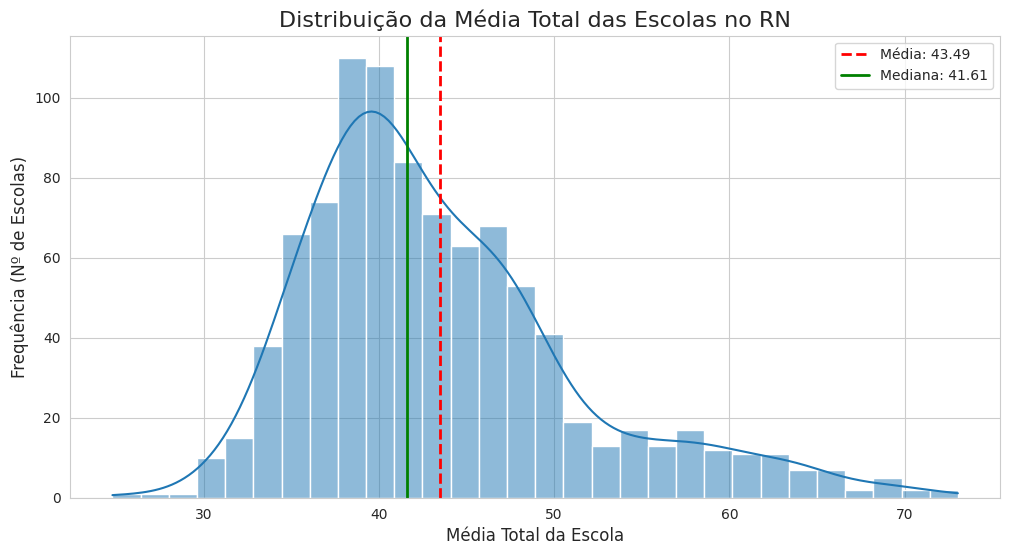

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurando o estilo e o tamanho do gráfico
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# Criando o histograma para a Media_Total
# bins=30 define o número de barras
# kde=True desenha uma linha de densidade suave sobre o histograma
sns.histplot(data=df_analise, x='Media_Total', bins=30, kde=True)

# Adicionando linhas verticais para a média e a mediana, como vimos na tabela
plt.axvline(df_analise['Media_Total'].mean(), color='red', linestyle='--', linewidth=2, label=f"Média: {df_analise['Media_Total'].mean():.2f}")
plt.axvline(df_analise['Media_Total'].median(), color='green', linestyle='-', linewidth=2, label=f"Mediana: {df_analise['Media_Total'].median():.2f}")

# Adicionando títulos e legendas para clareza
plt.title('Distribuição da Média Total das Escolas no RN', fontsize=16)
plt.xlabel('Média Total da Escola', fontsize=12)
plt.ylabel('Frequência (Nº de Escolas)', fontsize=12)
plt.legend() # Mostra as legendas das linhas de média e mediana
plt.show()

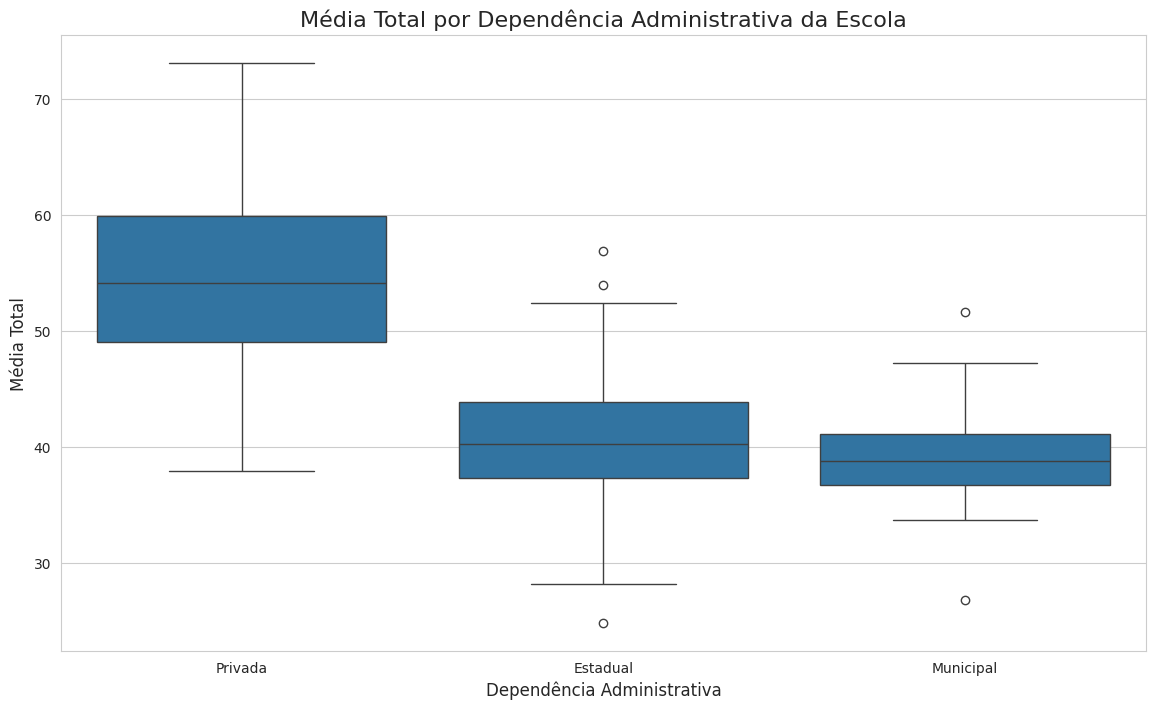

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))

# Criando o Box Plot para comparar a Média Total pela Dependência Administrativa
sns.boxplot(data=df_analise, x='Dependencia_Administrativa', y='Media_Total', order=df_analise.groupby('Dependencia_Administrativa')['Media_Total'].median().sort_values(ascending=False).index)

# Adicionando títulos e legendas para clareza
plt.title('Média Total por Dependência Administrativa da Escola', fontsize=16)
plt.xlabel('Dependência Administrativa', fontsize=12)
plt.ylabel('Média Total', fontsize=12)
plt.show()

In [19]:
# Conta quantas escolas de cada tipo de Dependência Administrativa
# existem no nosso DataFrame de análise final.
print("Contagem de escolas por Dependência Administrativa no DataFrame 'df_analise':")
df_analise['Dependencia_Administrativa'].value_counts()

Contagem de escolas por Dependência Administrativa no DataFrame 'df_analise':


Dependencia_Administrativa
Estadual     717
Privada      196
Municipal     29
Name: count, dtype: int64

In [1]:
# No DataFrame 'df_tratado_limpo' (antes do filtro final), vamos selecionar apenas as escolas Federais.
df_federal = df_tratado_limpo[df_tratado_limpo['Dependencia_Administrativa'] == 'Federal']

print(f"Encontramos {len(df_federal)} escolas da rede Federal no DataFrame antes do filtro.")
print("Abaixo estão os dados de Média Total e Taxas de Aprovação para elas:")

# Vamos exibir as colunas de desempenho para estas escolas
display(df_federal[['Nome_Escola', 'Media_Total', 'Taxa_Aprovacao']])

NameError: name 'df_tratado_limpo' is not defined

In [2]:
import pandas as pd
import gspread
from google.colab import auth

# ===================================================================
# PASSO 1: CONECTAR E CARREGAR OS DADOS DO GOOGLE SHEETS
# ===================================================================
print("PASSO 1: Conectando ao Google Sheets e carregando dados...")
try:
    auth.authenticate_user()
    import google.auth
    creds, _ = google.auth.default()
    gc = gspread.authorize(creds)

    nome_da_planilha = "escolas_rn_enem_gemini"
    spreadsheet = gc.open(nome_da_planilha)

    # Carrega as abas 'tratado' e 'Metadados'
    worksheet_tratado = spreadsheet.worksheet("tratado")
    df_tratado = pd.DataFrame(worksheet_tratado.get_all_records())

    worksheet_metadados = spreadsheet.worksheet("Metadados")
    df_metadados = pd.DataFrame(worksheet_metadados.get_all_records())
    print("Dados carregados com sucesso!")

except Exception as e:
    print(f"Ocorreu um erro ao carregar os dados: {e}")

# ===================================================================
# PASSO 2: RENOMEAR, CONVERTER TIPOS E LIMPAR DADOS
# ===================================================================
print("\nPASSO 2: Iniciando limpeza e tratamento dos dados...")

# Renomeando colunas
mapa_de_nomes = pd.Series(df_metadados['Nome da Variável'].values, index=df_metadados['Código']).to_dict()
df_tratado.rename(columns=mapa_de_nomes, inplace=True)

# Convertendo tipos de dados
colunas_para_converter = [
    'Taxa_Participacao', 'Media_Ciencias_Natureza', 'Media_Ciencias_Humanas',
    'Media_Linguagens_Codigos', 'Media_Matematica', 'Media_Redacao',
    'Media_Prova_Objetiva', 'Media_Total', 'Indice_Status_Educacional',
    'Percentual_Formacao_Docente', 'Taxa_Permanencia', 'Taxa_Aprovacao',
    'Taxa_Reprovacao', 'Taxa_Abandono'
]
for coluna in colunas_para_converter:
    if coluna in df_tratado.columns:
        if not pd.api.types.is_numeric_dtype(df_tratado[coluna]):
            df_tratado[coluna] = pd.to_numeric(df_tratado[coluna].astype(str).str.replace(',', '.'), errors='coerce')

# Removendo colunas com mais de 70% de dados ausentes (criando df_tratado_limpo)
colunas_para_remover = ['Indice_Status_Educacional', 'Media_Prova_Objetiva', 'Taxa_Permanencia', 'Percentual_Formacao_Docente']
df_tratado_limpo = df_tratado.drop(columns=colunas_para_remover)
print("Limpeza e tratamento concluídos.")


# ===================================================================
# PASSO 3: INSPECIONAR AS ESCOLAS DA REDE FEDERAL (Onde estávamos)
# ===================================================================
print("\nPASSO 3: Resgatando e inspecionando as escolas da Rede Federal...")

# Agora este comando deve funcionar, pois df_tratado_limpo foi definido acima
df_federal = df_tratado_limpo[df_tratado_limpo['Dependencia_Administrativa'] == 'Federal']

print(f"\nEncontramos {len(df_federal)} escolas da rede Federal no DataFrame antes do filtro final.")
print("Abaixo estão os dados de Média Total e Taxas de Aprovação para elas:")
display(df_federal[['Nome_Escola', 'Media_Total', 'Taxa_Aprovacao']])

PASSO 1: Conectando ao Google Sheets e carregando dados...
Dados carregados com sucesso!

PASSO 2: Iniciando limpeza e tratamento dos dados...
Limpeza e tratamento concluídos.

PASSO 3: Resgatando e inspecionando as escolas da Rede Federal...

Encontramos 65 escolas da rede Federal no DataFrame antes do filtro final.
Abaixo estão os dados de Média Total e Taxas de Aprovação para elas:


Nome_Escola  Media_Total  \
702                          ESCOLA AGRICOLA DE JUNDIAI          NaN   
940            CENTRO FED DE EDUCAÇAO TECNOLOGICA DO RN          NaN   
1122           CENTRO FEDERAL DE EDUC TECNOLOGICA DO RN          NaN   
2134                         ESCOLA AGRICOLA DE JUNDIAI          NaN   
2135                         ESCOLA AGRICOLA DE JUNDIAI          NaN   
...                                                 ...          ...   
3031  INSTITUTO FEDERAL DE EDUCACAO CIENCIA E TECNOL...          NaN   
3032  INSTITUTO FEDERAL DE EDUCACAO CIENCIA E TECNOL...          NaN   
3033  INSTITUTO FEDERAL DE EDUCACAO CIENCIA E TECNOL...          NaN   
3034  INSTITUTO FEDERAL DE EDUCACAO CIENCIA E TECNOL...          NaN   
3035                                IFRN - CAMPUS CAICO          NaN   

      Taxa_Aprovacao  
702             79.7  
940             86.6  
1122            95.0  
2134            84.0  
2135            81.0  
...              ...  
3031            77.6  
3032            76.0  
3033            96.7  
3034            90.9  
3035            85.1  

[65 rows x 3 columns]

Criando novo Box Plot para comparar a TAXA DE APROVAÇÃO entre as redes...


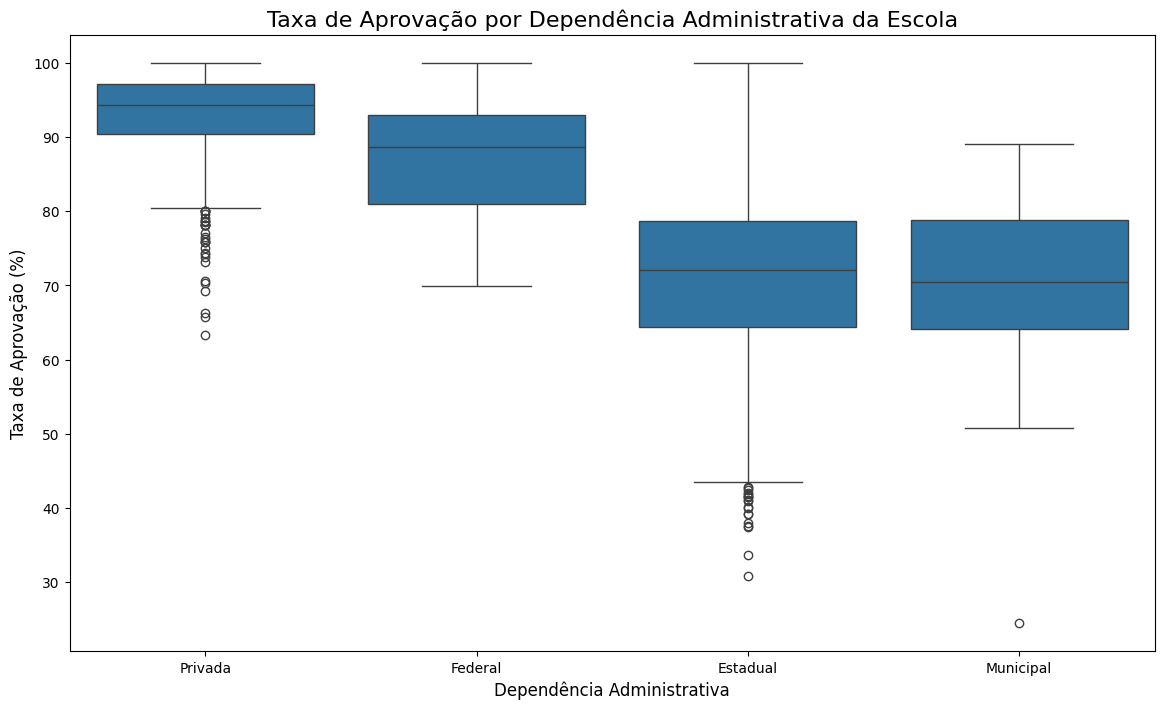

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

print("Criando novo Box Plot para comparar a TAXA DE APROVAÇÃO entre as redes...")

plt.figure(figsize=(14, 8))

# Criando o Box Plot usando a Taxa_Aprovacao como medida de desempenho
# Note que usamos o 'df_tratado_limpo', que contém todas as escolas.
# O 'order' organiza as caixas da maior para a menor mediana, facilitando a leitura.
sns.boxplot(data=df_tratado_limpo, x='Dependencia_Administrativa', y='Taxa_Aprovacao', order=df_tratado_limpo.groupby('Dependencia_Administrativa')['Taxa_Aprovacao'].median().sort_values(ascending=False).index)

# Adicionando títulos e legendas
plt.title('Taxa de Aprovação por Dependência Administrativa da Escola', fontsize=16)
plt.xlabel('Dependência Administrativa', fontsize=12)
plt.ylabel('Taxa de Aprovação (%)', fontsize=12)
plt.show()

In [4]:
print("Calculando a Média Total a partir das notas das provas individuais...")

# 1. Definir as colunas das notas que compõem a média
colunas_de_notas = [
    'Media_Ciencias_Natureza',
    'Media_Ciencias_Humanas',
    'Media_Linguagens_Codigos',
    'Media_Matematica',
    'Media_Redacao'
]

# 2. Calcular a média dessas colunas para cada linha (escola) no df_tratado_limpo
# O .mean(axis=1) calcula a média na horizontal (ao longo das colunas para cada linha)
# Por padrão, ele ignora valores ausentes (NaN) no cálculo.
media_calculada = df_tratado_limpo[colunas_de_notas].mean(axis=1)

# 3. Criar uma nova coluna com o resultado para compararmos
df_tratado_limpo['Media_Total_Calculada'] = media_calculada

print("\nCálculo concluído! Vamos comparar a 'Media_Total' original com a nossa 'Media_Total_Calculada'.")

# 4. Verificar quantos valores conseguimos calcular
print("\n--- ANTES DO CÁLCULO ---")
print(f"Valores não-nulos em 'Media_Total' original: {df_tratado_limpo['Media_Total'].notna().sum()}")

print("\n--- DEPOIS DO CÁLCULO ---")
print(f"Valores não-nulos em 'Media_Total_Calculada': {df_tratado_limpo['Media_Total_Calculada'].notna().sum()}")


# 5. Exibir as colunas para comparação visual
print("\nExibindo as primeiras 10 linhas para comparação:")
display(df_tratado_limpo[['Nome_Escola', 'Media_Total', 'Media_Total_Calculada']].head(10))

Calculando a Média Total a partir das notas das provas individuais...

Cálculo concluído! Vamos comparar a 'Media_Total' original com a nossa 'Media_Total_Calculada'.

--- ANTES DO CÁLCULO ---
Valores não-nulos em 'Media_Total' original: 942

--- DEPOIS DO CÁLCULO ---
Valores não-nulos em 'Media_Total_Calculada': 2107

Exibindo as primeiras 10 linhas para comparação:


Nome_Escola  Media_Total  \
0                 EE DESEM SILVERIO SOARES ENS MEDIO        40.82   
1                 EE DESEM SILVERIO SOARES ENS MEDIO        39.24   
2   E. E. DESEMBARGADOR SILVERIO SOARES ENSINO MEDIO        46.64   
3  ESCOLA ESTADUAL DESEMBARGADOR SILVERIO SOARES ...          NaN   
4               EE CONEGO ISMAR FERNANDES DE QUEIROZ        47.37   
5                 EE CONSELHEIRO BRITO GUERRA 1 GRAU        34.11   
6                 EE CONSELHEIRO BRITO GUERRA 1 GRAU        43.91   
7  EE CONSELHEIRO BRITO GUERRA ENSINO FUNDAMENTAL...          NaN   
8               INST DANTAS MONTEIRO ENS 1 E 2 GRAUS        47.85   
9               INST DANTAS MONTEIRO ENS 1 E 2 GRAUS        45.61   

   Media_Total_Calculada  
0                    NaN  
1                    NaN  
2                    NaN  
3                  56.11  
4                    NaN  
5                    NaN  
6                    NaN  
7                  48.33  
8                    NaN  
9                    NaN

In [5]:
# Unificando as colunas
print("Unificando 'Media_Total' com os valores calculados...")

# 1. Onde 'Media_Total' for nulo, preenchemos com o valor da 'Media_Total_Calculada'
# O 'inplace=True' faz a modificação diretamente no nosso DataFrame
df_tratado_limpo['Media_Total'].fillna(df_tratado_limpo['Media_Total_Calculada'], inplace=True)

# 2. Agora que a unificação foi feita, podemos remover a coluna 'Media_Total_Calculada',
# pois ela não é mais necessária.
df_tratado_limpo.drop(columns=['Media_Total_Calculada'], inplace=True)

print("\nColuna 'Media_Total' atualizada e completa!")

# --- Verificação Final ---
print("\nVerificando a contagem de valores na coluna 'Media_Total' final:")
print(f"Total de valores não-nulos em 'Media_Total' agora: {df_tratado_limpo['Media_Total'].notna().sum()}")

Unificando 'Media_Total' com os valores calculados...

Coluna 'Media_Total' atualizada e completa!

Verificando a contagem de valores na coluna 'Media_Total' final:
Total de valores não-nulos em 'Media_Total' agora: 3049


/tmp/ipython-input-5-2790930276.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_tratado_limpo['Media_Total'].fillna(df_tratado_limpo['Media_Total_Calculada'], inplace=True)


Gerando o Box Plot definitivo com a Média Total completa...


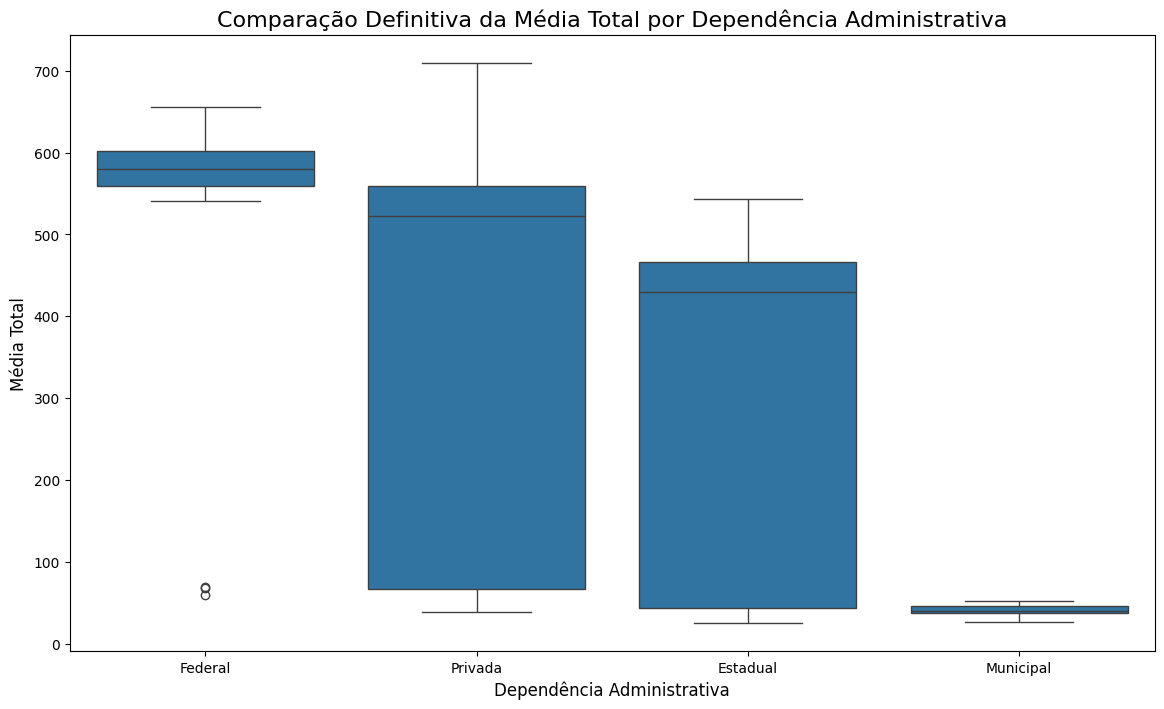

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

print("Gerando o Box Plot definitivo com a Média Total completa...")

plt.figure(figsize=(14, 8))

# O DataFrame df_tratado_limpo agora está completo!
# Vamos usá-lo para a nossa visualização final.
sns.boxplot(data=df_tratado_limpo, x='Dependencia_Administrativa', y='Media_Total', order=df_tratado_limpo.groupby('Dependencia_Administrativa')['Media_Total'].median().sort_values(ascending=False).index)

# Adicionando títulos e legendas
plt.title('Comparação Definitiva da Média Total por Dependência Administrativa', fontsize=16)
plt.xlabel('Dependência Administrativa', fontsize=12)
plt.ylabel('Média Total', fontsize=12)
plt.show()

Investigando a relação entre Média Total e Taxa de Aprovação...


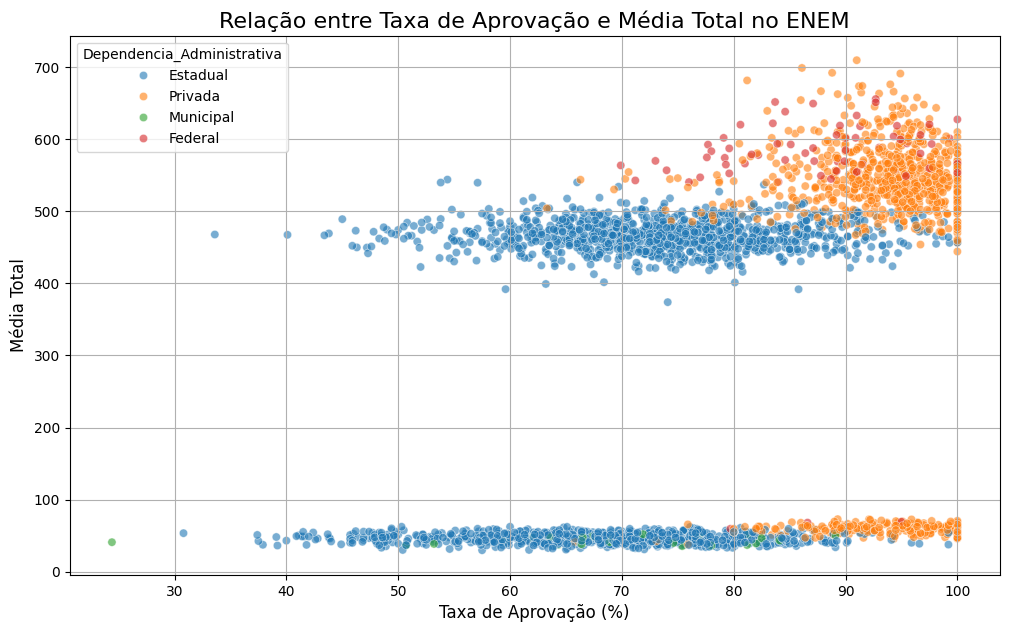

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

print("Investigando a relação entre Média Total e Taxa de Aprovação...")

plt.figure(figsize=(12, 7))

# Criando o gráfico de dispersão (scatterplot)
# 'hue' colore os pontos de acordo com a Dependência Administrativa
# 'alpha=0.6' deixa os pontos um pouco transparentes para vermos sobreposições
sns.scatterplot(data=df_tratado_limpo, x='Taxa_Aprovacao', y='Media_Total', hue='Dependencia_Administrativa', alpha=0.6)

# Títulos e legendas
plt.title('Relação entre Taxa de Aprovação e Média Total no ENEM', fontsize=16)
plt.xlabel('Taxa de Aprovação (%)', fontsize=12)
plt.ylabel('Média Total', fontsize=12)
plt.grid(True)
plt.show()

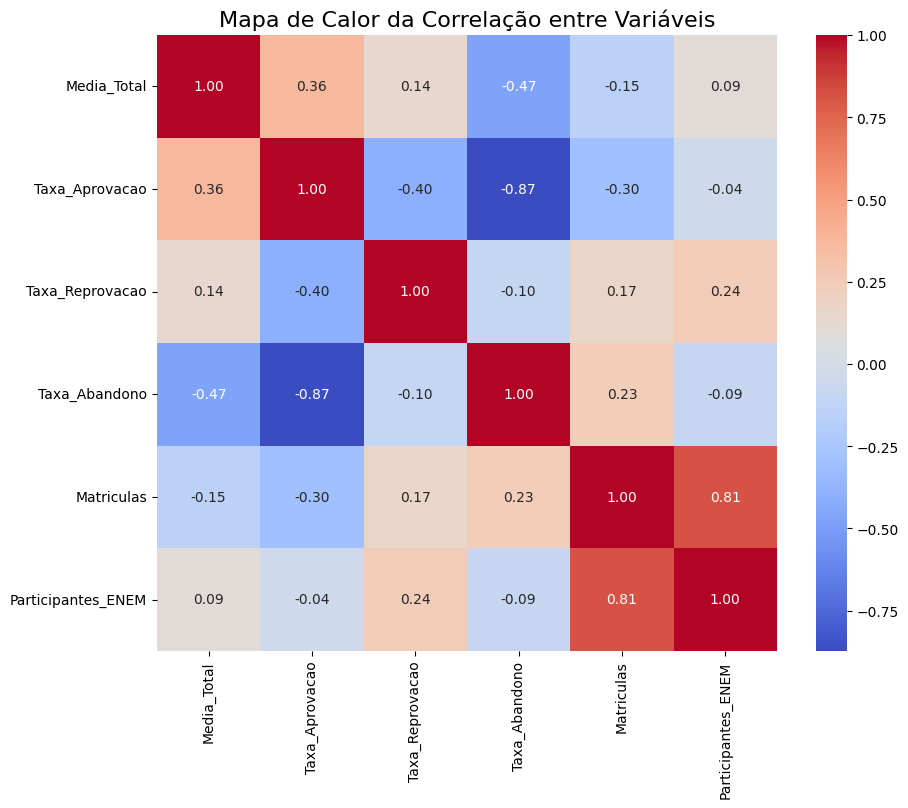

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecionando apenas as colunas numéricas de interesse para a matriz de correlação
colunas_interesse = ['Media_Total', 'Taxa_Aprovacao', 'Taxa_Reprovacao', 'Taxa_Abandono', 'Matriculas', 'Participantes_ENEM']
matriz_correlacao = df_tratado_limpo[colunas_interesse].corr()

# Criando um mapa de calor (heatmap) para visualizar a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor da Correlação entre Variáveis', fontsize=16)
plt.show()

Foram removidos 0 outliers para melhorar a visualização.


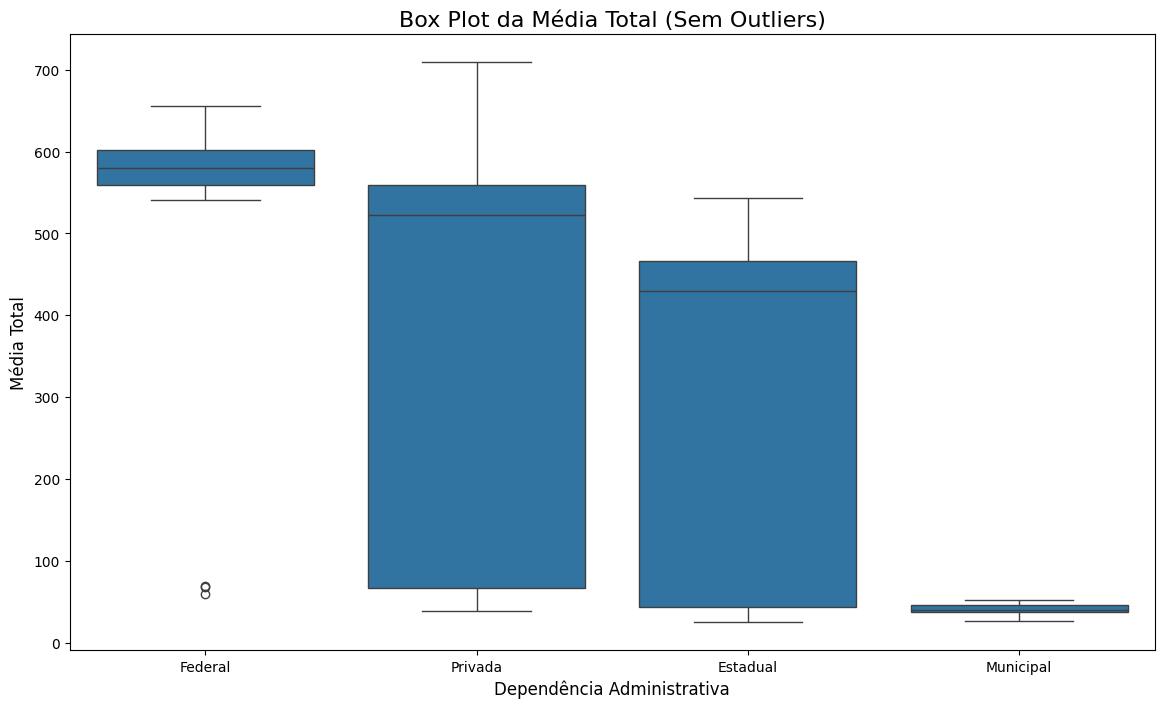

In [9]:
# Calculando os limites para identificar outliers na Media_Total
Q1 = df_tratado_limpo['Media_Total'].quantile(0.25)
Q3 = df_tratado_limpo['Media_Total'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrando o DataFrame para remover os outliers
df_sem_outliers = df_tratado_limpo[(df_tratado_limpo['Media_Total'] >= limite_inferior) & (df_tratado_limpo['Media_Total'] <= limite_superior)]

print(f"Foram removidos {len(df_tratado_limpo) - len(df_sem_outliers)} outliers para melhorar a visualização.")

# Criando o novo Box Plot com os dados filtrados
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_sem_outliers, x='Dependencia_Administrativa', y='Media_Total', order=df_sem_outliers.groupby('Dependencia_Administrativa')['Media_Total'].median().sort_values(ascending=False).index)
plt.title('Box Plot da Média Total (Sem Outliers)', fontsize=16)
plt.xlabel('Dependência Administrativa', fontsize=12)
plt.ylabel('Média Total', fontsize=12)
plt.show()

Gerando Box Plot para comparar o desempenho na Redação do ENEM...


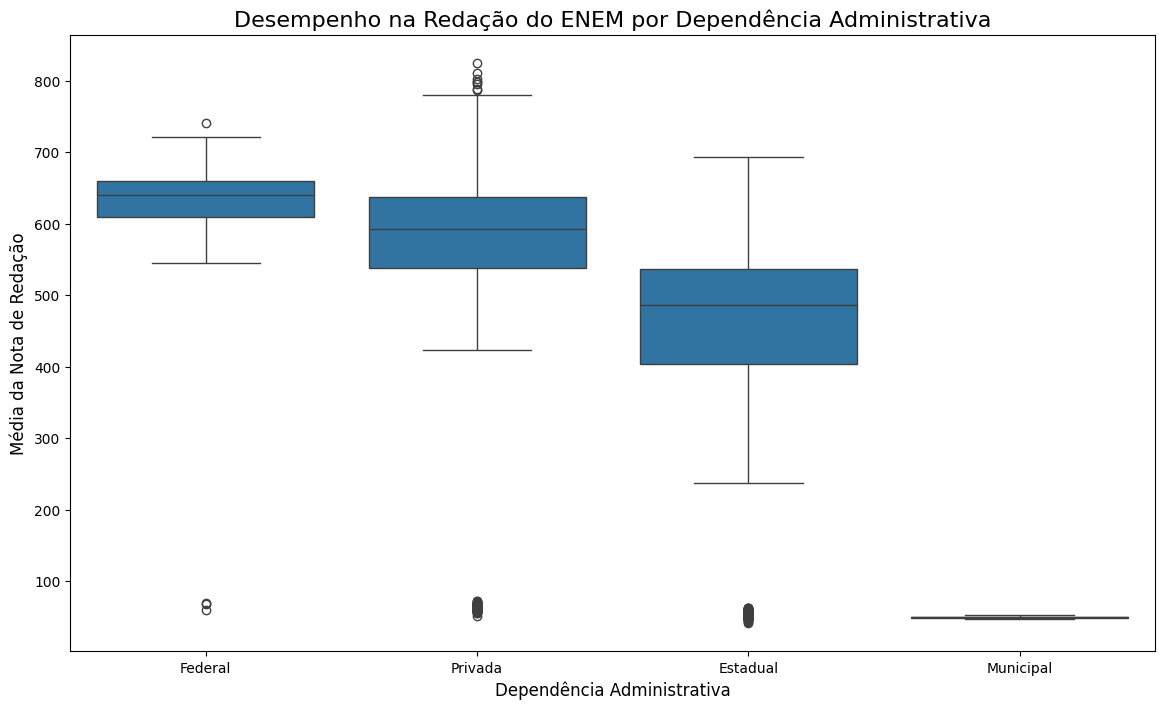


Total de escolas com nota de redação disponível para este gráfico:
Dependencia_Administrativa
Estadual     1294
Federal        65
Municipal       6
Privada       735
Name: Media_Redacao, dtype: int64


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

print("Gerando Box Plot para comparar o desempenho na Redação do ENEM...")

# Usaremos o df_tratado_limpo, nosso dataframe mais completo.
# O boxplot irá automaticamente utilizar apenas as escolas que possuem nota de redação.
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_tratado_limpo, x='Dependencia_Administrativa', y='Media_Redacao', order=df_tratado_limpo.groupby('Dependencia_Administrativa')['Media_Redacao'].median().sort_values(ascending=False).index)

# Adicionando títulos e legendas
plt.title('Desempenho na Redação do ENEM por Dependência Administrativa', fontsize=16)
plt.xlabel('Dependência Administrativa', fontsize=12)
plt.ylabel('Média da Nota de Redação', fontsize=12)
plt.show()

# Vamos verificar quantos dados estão sendo usados para este gráfico específico
print("\nTotal de escolas com nota de redação disponível para este gráfico:")
print(df_tratado_limpo.groupby('Dependencia_Administrativa')['Media_Redacao'].count())

Filtrando os dados para incluir apenas as redes Federal, Estadual e Privada...
O DataFrame original tinha 3049 linhas. O novo DataFrame filtrado tem 3014 linhas.

Gerando o Box Plot com os dados focados...


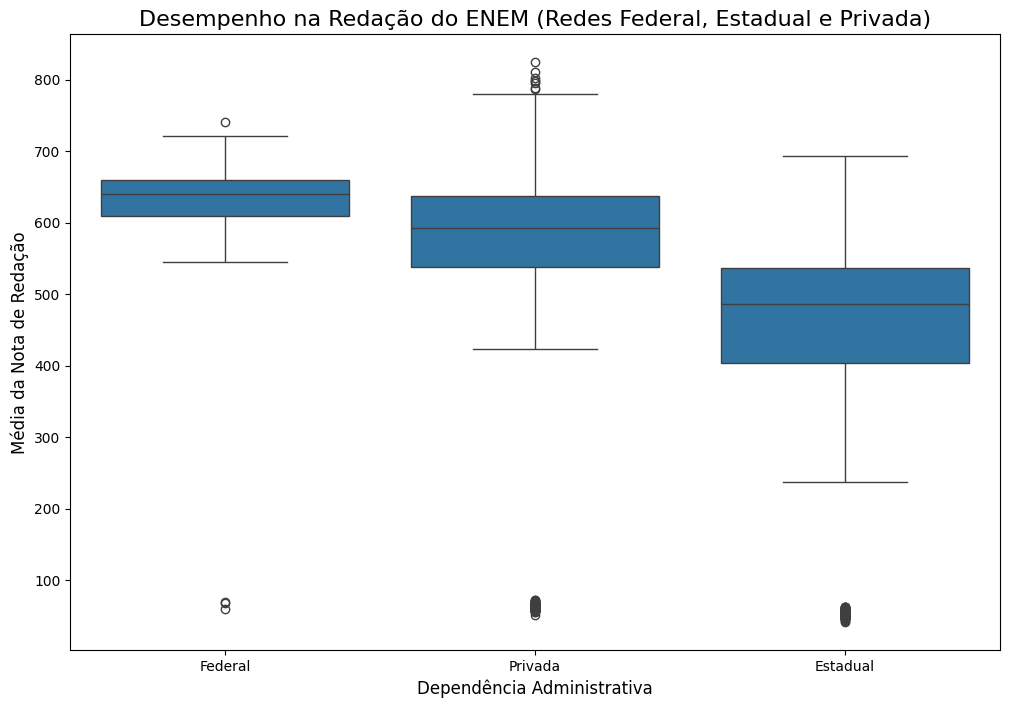

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

print("Filtrando os dados para incluir apenas as redes Federal, Estadual e Privada...")

# 1. Definir a lista com as redes de ensino que queremos manter na análise
redes_de_interesse = ['Federal', 'Estadual', 'Privada']

# 2. Criar um novo DataFrame filtrado usando o método .isin()
df_filtrado = df_tratado_limpo[df_tratado_limpo['Dependencia_Administrativa'].isin(redes_de_interesse)]

print(f"O DataFrame original tinha {len(df_tratado_limpo)} linhas. O novo DataFrame filtrado tem {len(df_filtrado)} linhas.")

# 3. Gerar o Box Plot novamente, agora com os dados filtrados
print("\nGerando o Box Plot com os dados focados...")
plt.figure(figsize=(12, 8))

sns.boxplot(data=df_filtrado, x='Dependencia_Administrativa', y='Media_Redacao', order=df_filtrado.groupby('Dependencia_Administrativa')['Media_Redacao'].median().sort_values(ascending=False).index)

# Adicionando títulos e legendas
plt.title('Desempenho na Redação do ENEM (Redes Federal, Estadual e Privada)', fontsize=16)
plt.xlabel('Dependência Administrativa', fontsize=12)
plt.ylabel('Média da Nota de Redação', fontsize=12)
plt.show()

Preparando os dados e gerando o gráfico comparativo...


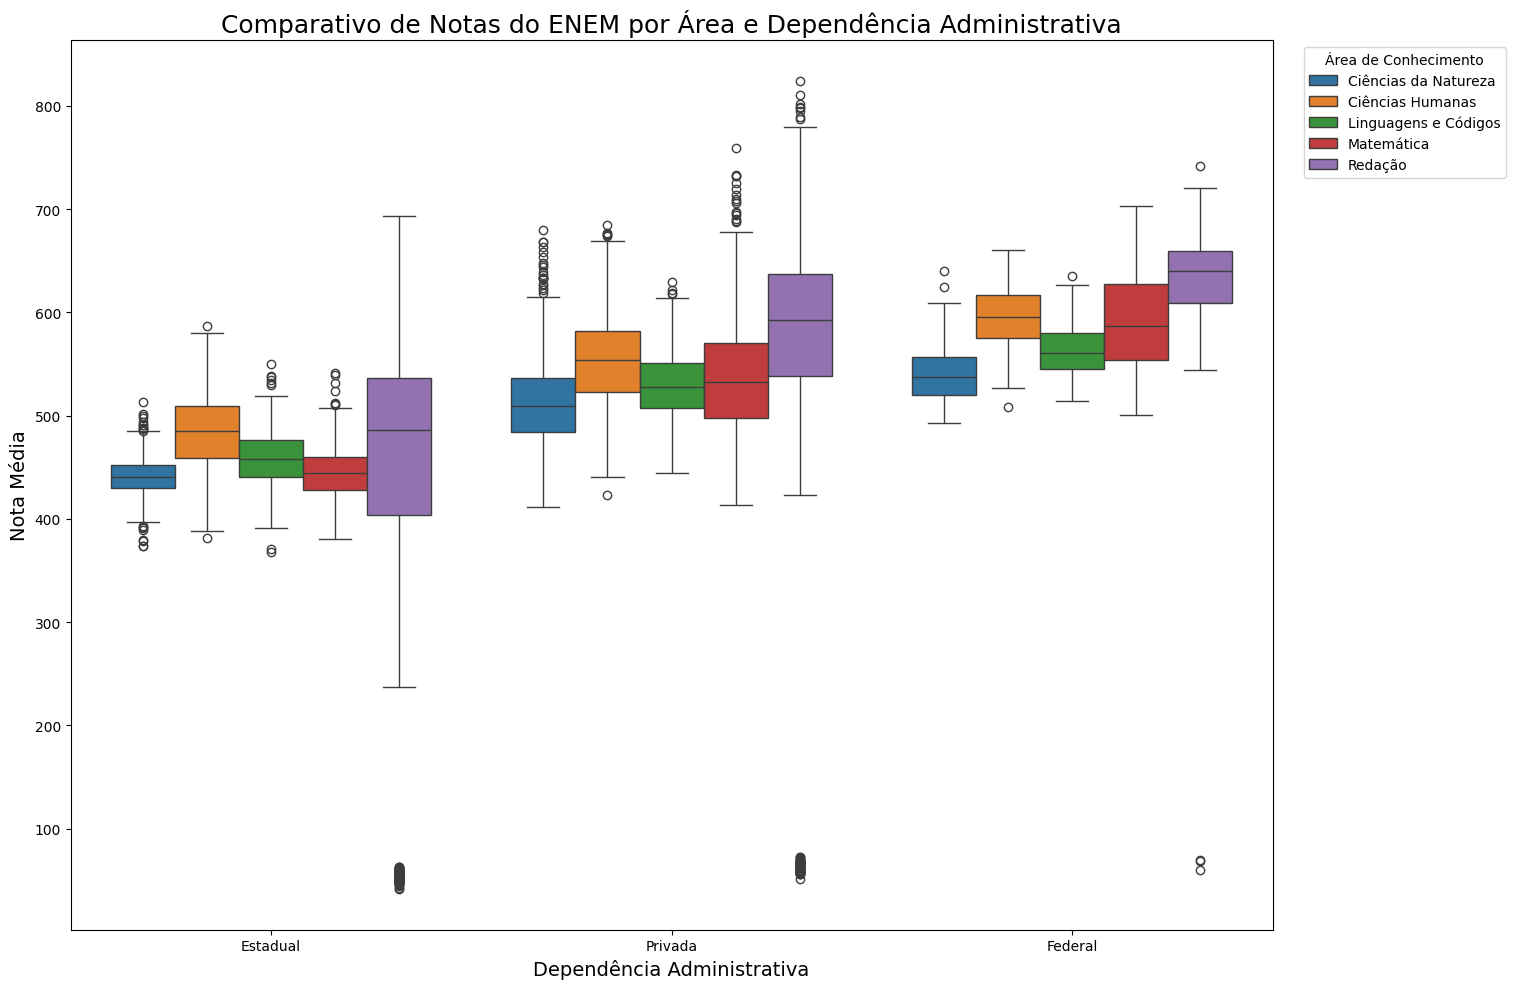

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("Preparando os dados e gerando o gráfico comparativo...")

# 1. Definir as colunas de notas que queremos comparar
colunas_de_notas = [
    'Media_Ciencias_Natureza', 'Media_Ciencias_Humanas',
    'Media_Linguagens_Codigos', 'Media_Matematica', 'Media_Redacao'
]

# 2. Reorganizar (unpivot) o DataFrame para o formato 'longo' com o pd.melt
# Isso é necessário para criar o gráfico com múltiplos grupos
df_longo = pd.melt(df_filtrado,
                     id_vars=['Dependencia_Administrativa'],
                     value_vars=colunas_de_notas,
                     var_name='Area_de_Conhecimento',
                     value_name='Nota_Media')

# 3. Renomear as áreas para nomes mais amigáveis no gráfico
nomes_amigaveis = {
    'Media_Ciencias_Natureza': 'Ciências da Natureza',
    'Media_Ciencias_Humanas': 'Ciências Humanas',
    'Media_Linguagens_Codigos': 'Linguagens e Códigos',
    'Media_Matematica': 'Matemática',
    'Media_Redacao': 'Redação'
}
df_longo['Area_de_Conhecimento'] = df_longo['Area_de_Conhecimento'].map(nomes_amigaveis)


# 4. Gerar o Box Plot agrupado
plt.figure(figsize=(18, 10))
sns.boxplot(data=df_longo, x='Dependencia_Administrativa', y='Nota_Media', hue='Area_de_Conhecimento')

# Títulos e legendas
plt.title('Comparativo de Notas do ENEM por Área e Dependência Administrativa', fontsize=18)
plt.xlabel('Dependência Administrativa', fontsize=14)
plt.ylabel('Nota Média', fontsize=14)
plt.legend(title='Área de Conhecimento', bbox_to_anchor=(1.02, 1), loc='upper left') # Coloca a legenda para fora do gráfico
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Ajusta o layout para a legenda não cortar
plt.show()

Gerando o Gráfico de Dispersão com os dados das 3 redes principais...


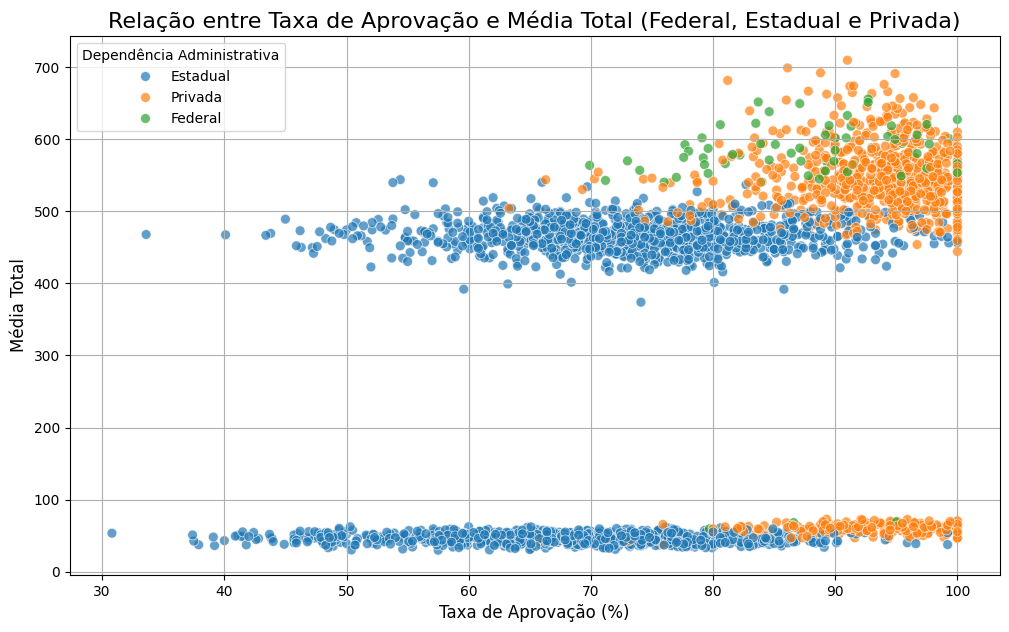

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lembre-se que o DataFrame 'df_filtrado' já foi criado em um passo anterior.
# Se encontrar um erro de 'df_filtrado' não definido, basta rodar novamente a célula que o cria.

print("Gerando o Gráfico de Dispersão com os dados das 3 redes principais...")

plt.figure(figsize=(12, 7))

# Criando o gráfico de dispersão com o DataFrame 'df_filtrado'
# O 'alpha' ajusta a transparência e 's' o tamanho dos pontos para melhor visualização
sns.scatterplot(data=df_filtrado, x='Taxa_Aprovacao', y='Media_Total', hue='Dependencia_Administrativa', alpha=0.7, s=50)

# Títulos e legendas
plt.title('Relação entre Taxa de Aprovação e Média Total (Federal, Estadual e Privada)', fontsize=16)
plt.xlabel('Taxa de Aprovação (%)', fontsize=12)
plt.ylabel('Média Total', fontsize=12)
plt.grid(True)
plt.legend(title='Dependência Administrativa')
plt.show()

Preparando os dados e gerando o gráfico comparativo por disciplina...


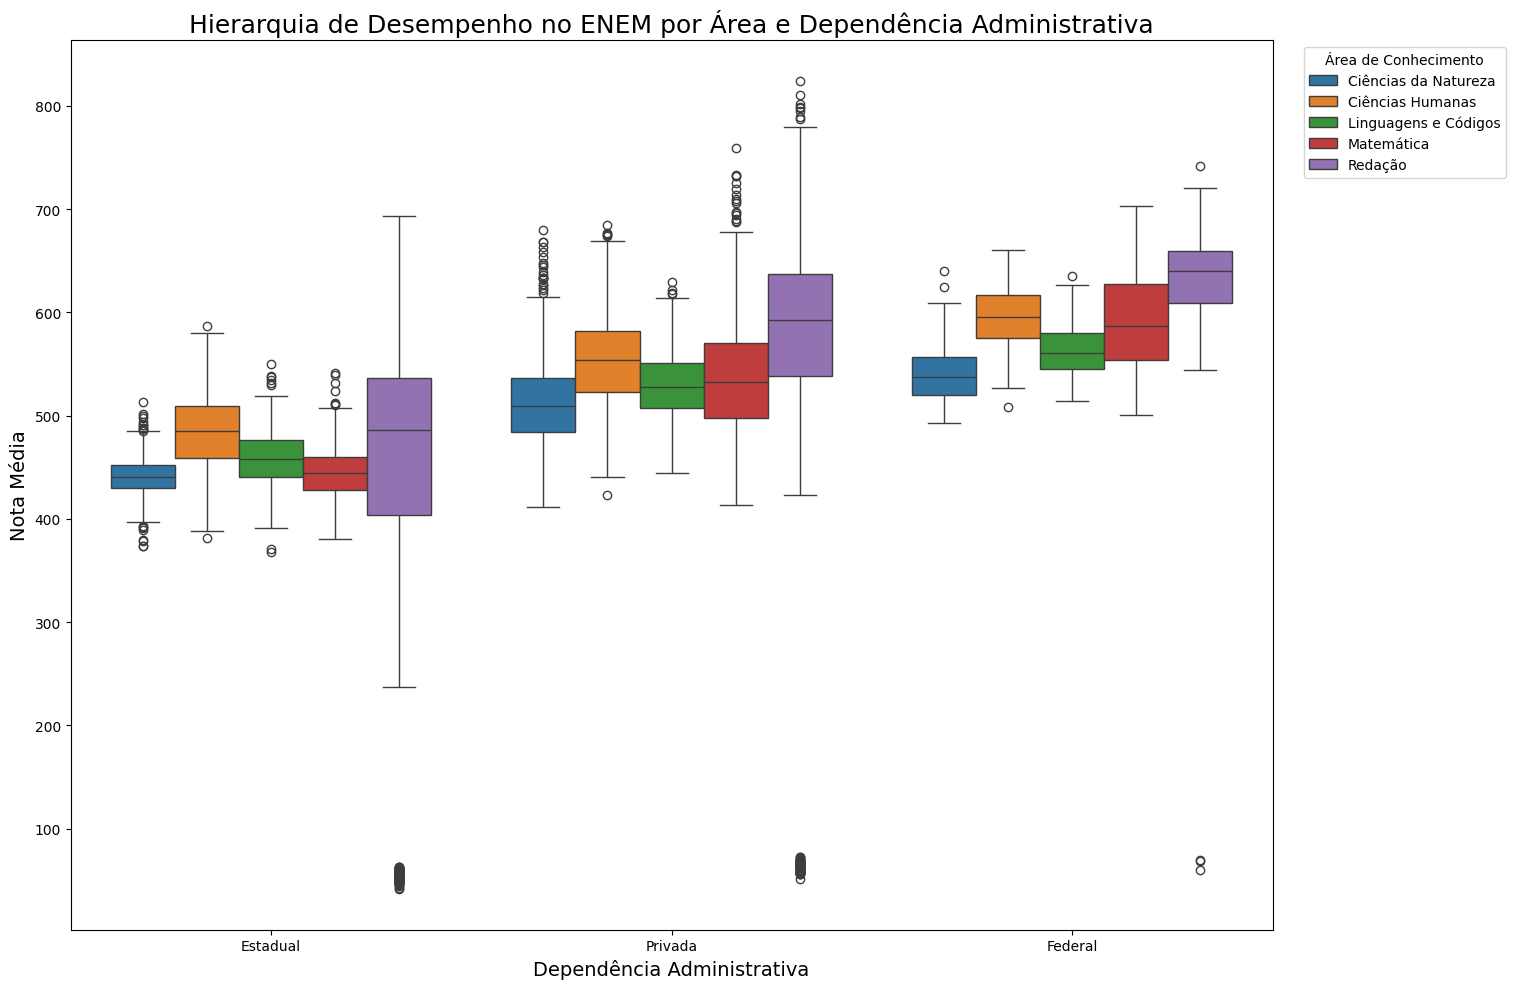

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("Preparando os dados e gerando o gráfico comparativo por disciplina...")

# Lembre-se que o DataFrame 'df_filtrado' contém apenas as redes Federal, Estadual e Privada.
# Se ele não estiver definido, rode novamente a célula que o cria.

# 1. Definir as colunas de notas que queremos comparar
colunas_de_notas = [
    'Media_Ciencias_Natureza', 'Media_Ciencias_Humanas',
    'Media_Linguagens_Codigos', 'Media_Matematica', 'Media_Redacao'
]

# 2. Reorganizar (unpivot) o DataFrame para o formato 'longo'
df_longo = pd.melt(df_filtrado,
                     id_vars=['Dependencia_Administrativa'],
                     value_vars=colunas_de_notas,
                     var_name='Area_de_Conhecimento',
                     value_name='Nota_Media')

# 3. Renomear as áreas para nomes mais amigáveis
nomes_amigaveis = {
    'Media_Ciencias_Natureza': 'Ciências da Natureza',
    'Media_Ciencias_Humanas': 'Ciências Humanas',
    'Media_Linguagens_Codigos': 'Linguagens e Códigos',
    'Media_Matematica': 'Matemática',
    'Media_Redacao': 'Redação'
}
df_longo['Area_de_Conhecimento'] = df_longo['Area_de_Conhecimento'].map(nomes_amigaveis)


# 4. Gerar o Box Plot agrupado
plt.figure(figsize=(18, 10))
sns.boxplot(data=df_longo, x='Dependencia_Administrativa', y='Nota_Media', hue='Area_de_Conhecimento')

# Títulos e legendas
plt.title('Hierarquia de Desempenho no ENEM por Área e Dependência Administrativa', fontsize=18)
plt.xlabel('Dependência Administrativa', fontsize=14)
plt.ylabel('Nota Média', fontsize=14)
plt.legend(title='Área de Conhecimento', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

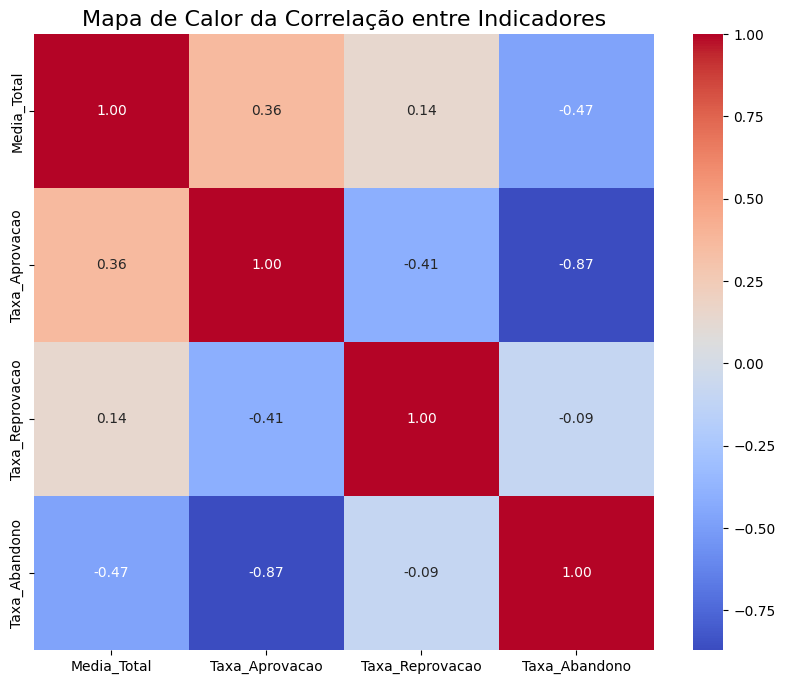

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

colunas_interesse = ['Media_Total', 'Taxa_Aprovacao', 'Taxa_Reprovacao', 'Taxa_Abandono']
# Usamos .dropna() aqui para garantir que a correlação seja calculada apenas com dados completos para esses pares
matriz_correlacao = df_filtrado[colunas_interesse].dropna().corr()

plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor da Correlação entre Indicadores', fontsize=16)
plt.show()

Gerando o Gráfico de Regressão para visualizar a tendência...


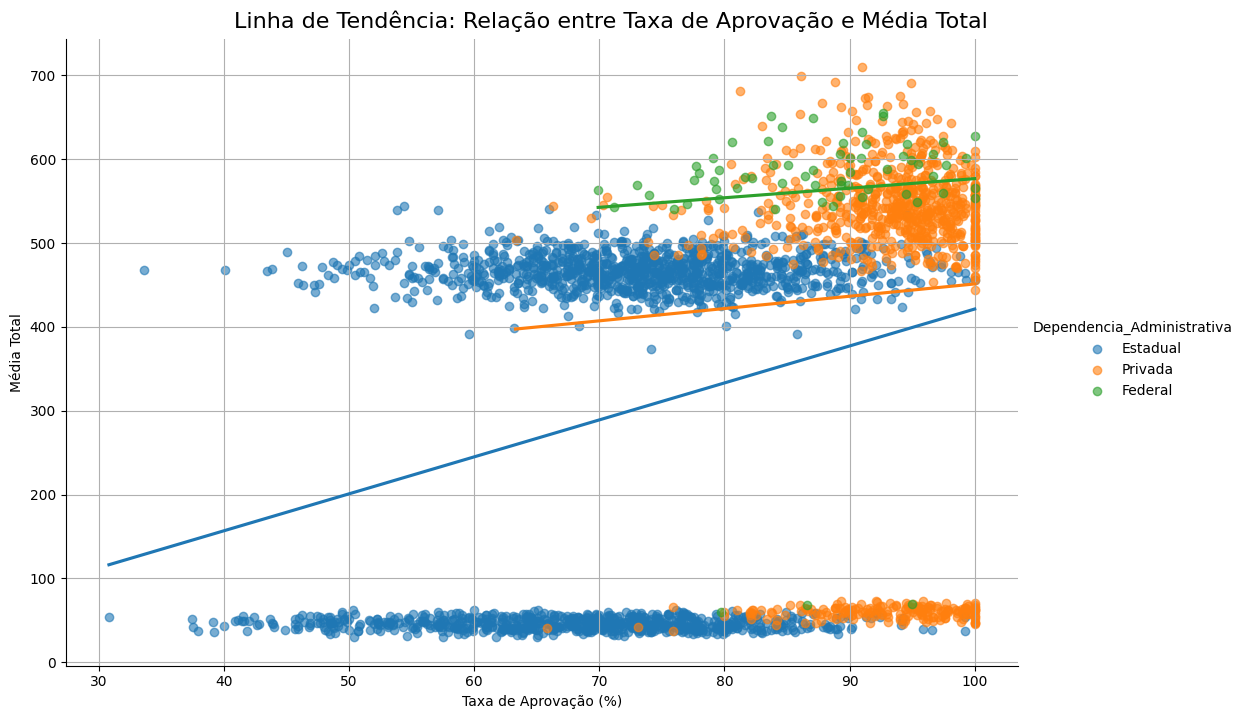

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

print("Gerando o Gráfico de Regressão para visualizar a tendência...")

# O sns.lmplot é uma função de nível de figura, ele cria e gerencia o próprio gráfico.
# 'height' e 'aspect' controlam o tamanho.
# 'ci=None' remove a sombra de intervalo de confiança para um visual mais limpo.
# O 'hue' cria uma linha de regressão para cada categoria.
g = sns.lmplot(data=df_filtrado, x='Taxa_Aprovacao', y='Media_Total', hue='Dependencia_Administrativa',
               height=7, aspect=1.5, scatter_kws={'alpha':0.6}, ci=None)

# Adicionando títulos e outras formatações
g.fig.suptitle('Linha de Tendência: Relação entre Taxa de Aprovação e Média Total', fontsize=16, y=1.02)
g.set_axis_labels('Taxa de Aprovação (%)', 'Média Total')
plt.grid(True)
plt.show()

--- Gerando Gráfico 1: Gráfico de Dispersão ---


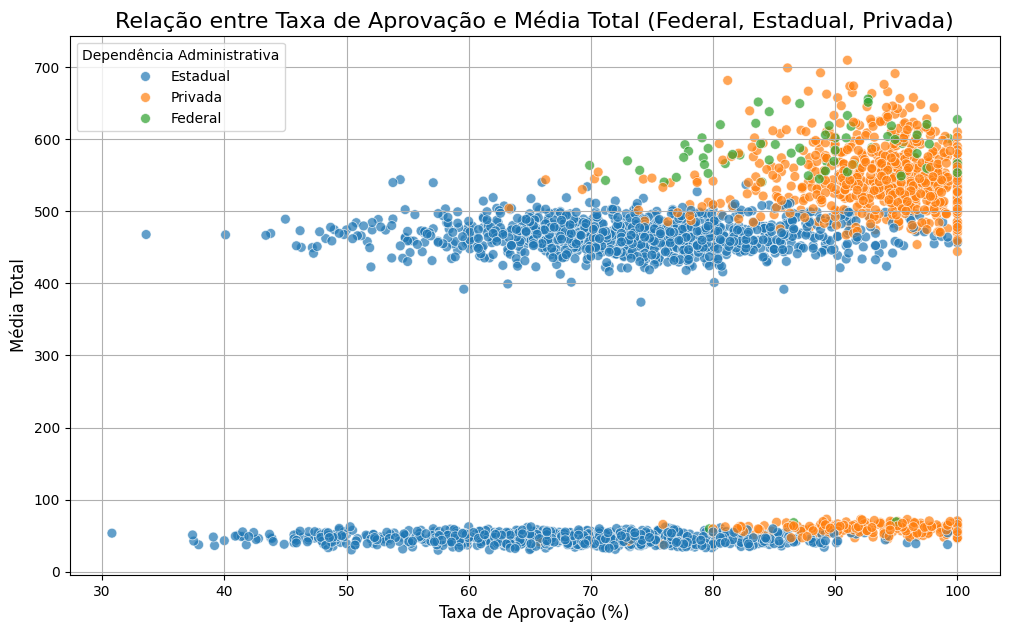



--- Gerando Gráfico 2: Mapa de Calor da Correlação ---


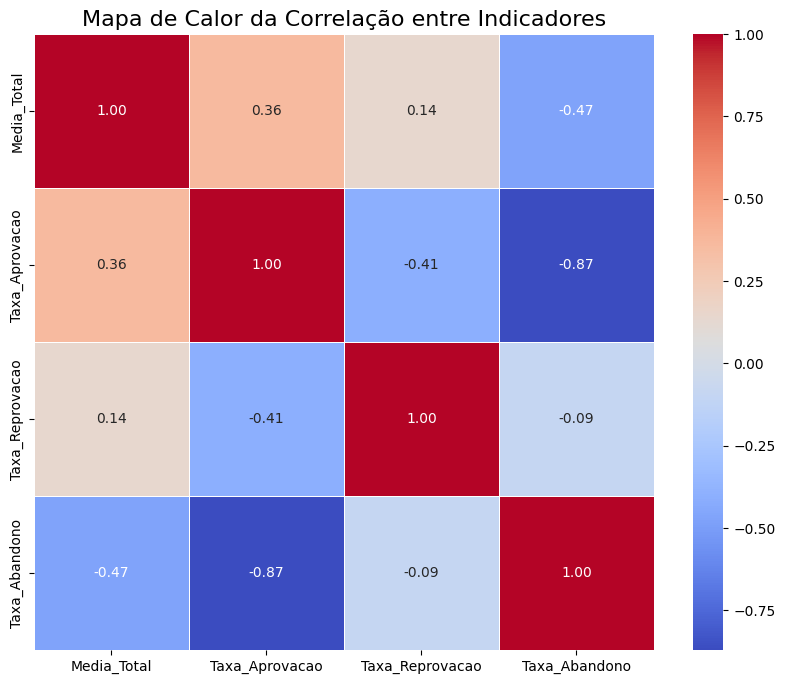

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Garantindo que estamos usando o DataFrame filtrado para ambos os gráficos
# Lembre-se que 'df_filtrado' contém apenas as redes Federal, Estadual e Privada.

print("--- Gerando Gráfico 1: Gráfico de Dispersão ---")
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df_filtrado, x='Taxa_Aprovacao', y='Media_Total', hue='Dependencia_Administrativa', alpha=0.7, s=50)
plt.title('Relação entre Taxa de Aprovação e Média Total (Federal, Estadual, Privada)', fontsize=16)
plt.xlabel('Taxa de Aprovação (%)', fontsize=12)
plt.ylabel('Média Total', fontsize=12)
plt.grid(True)
plt.legend(title='Dependência Administrativa')
plt.show()

print("\n\n--- Gerando Gráfico 2: Mapa de Calor da Correlação ---")
colunas_interesse = ['Media_Total', 'Taxa_Aprovacao', 'Taxa_Reprovacao', 'Taxa_Abandono']
# Usamos .dropna() para garantir que a correlação seja calculada apenas com dados completos para esses pares
matriz_correlacao = df_filtrado[colunas_interesse].dropna().corr()

plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mapa de Calor da Correlação entre Indicadores', fontsize=16)
plt.show()

--- Gerando Gráfico 1: Gráfico de Dispersão ---


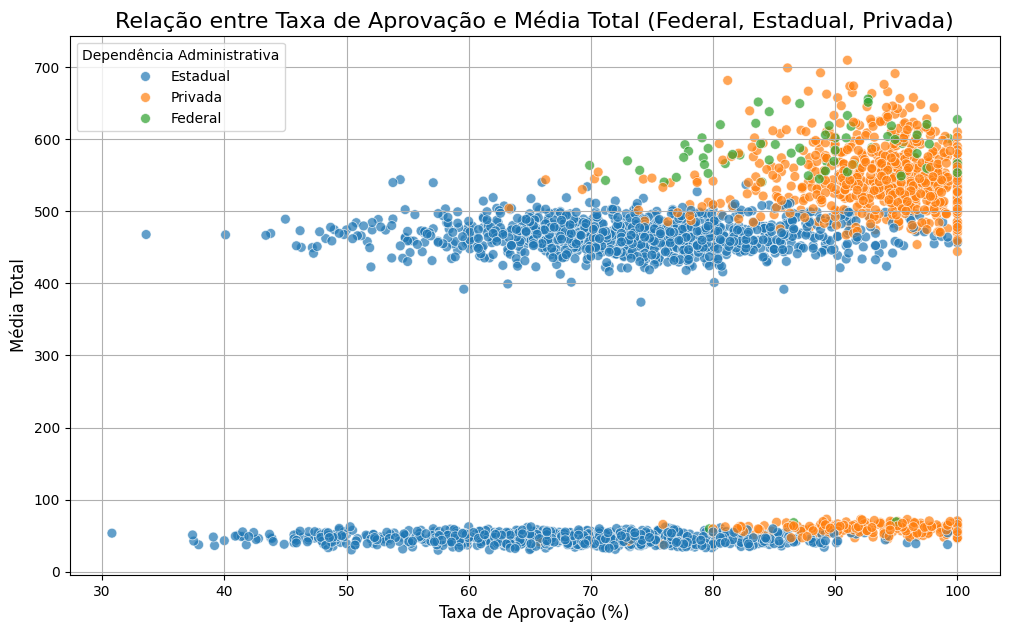



--- Gerando Gráfico 2: Mapa de Calor da Correlação (Versão Correta) ---


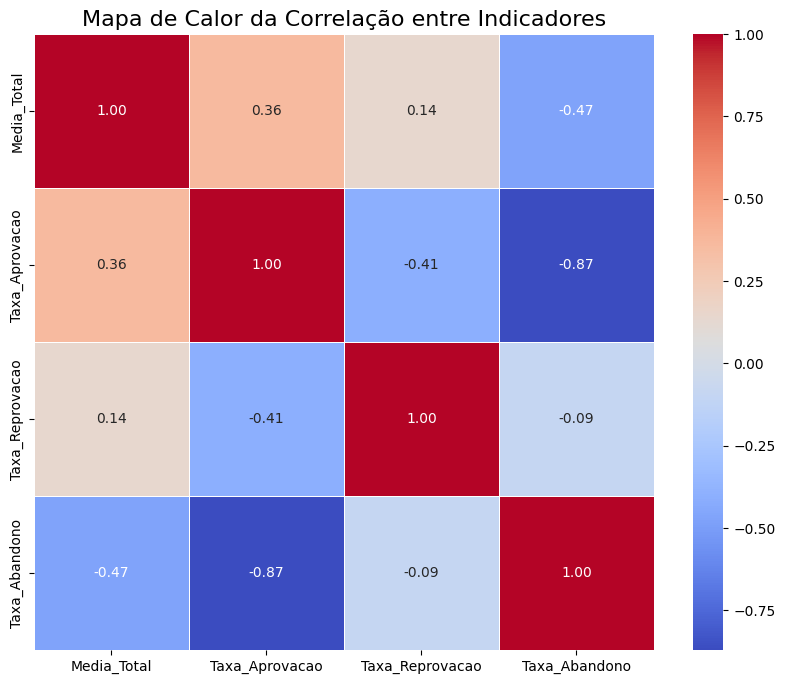

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lembre-se que 'df_filtrado' contém apenas as redes Federal, Estadual e Privada.

print("--- Gerando Gráfico 1: Gráfico de Dispersão ---")
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df_filtrado, x='Taxa_Aprovacao', y='Media_Total', hue='Dependencia_Administrativa', alpha=0.7, s=50)
plt.title('Relação entre Taxa de Aprovação e Média Total (Federal, Estadual, Privada)', fontsize=16)
plt.xlabel('Taxa de Aprovação (%)', fontsize=12)
plt.ylabel('Média Total', fontsize=12)
plt.grid(True)
plt.legend(title='Dependência Administrativa')
plt.show()

print("\n\n--- Gerando Gráfico 2: Mapa de Calor da Correlação (Versão Correta) ---")
colunas_interesse = ['Media_Total', 'Taxa_Aprovacao', 'Taxa_Reprovacao', 'Taxa_Abandono']
matriz_correlacao = df_filtrado[colunas_interesse].dropna().corr()

plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mapa de Calor da Correlação entre Indicadores', fontsize=16)
plt.show()

--- Gerando Mapa de Calor com um Novo Esquema de Cores ---


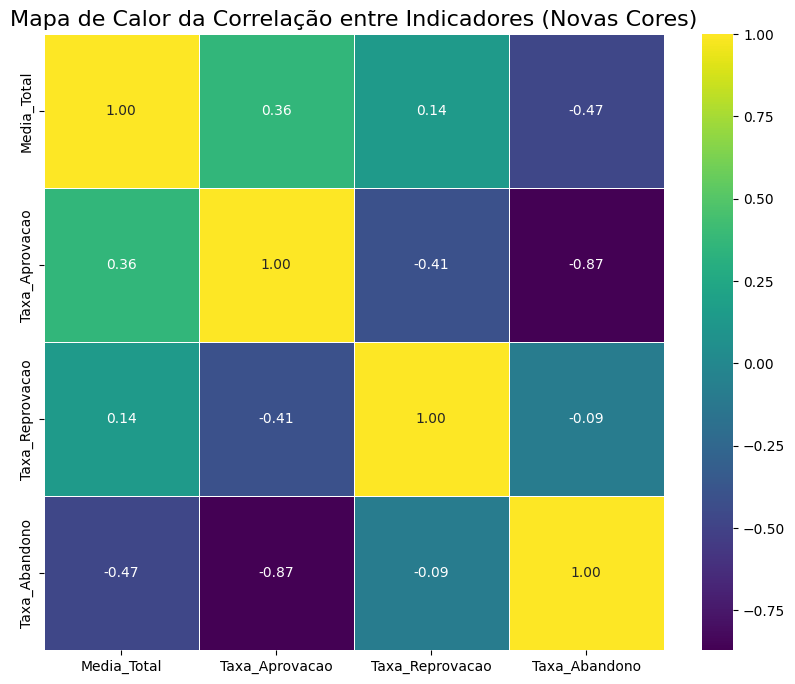

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

print("--- Gerando Mapa de Calor com um Novo Esquema de Cores ---")

# Assegurando que estamos usando o DataFrame focado nas 3 redes principais
colunas_interesse = ['Media_Total', 'Taxa_Aprovacao', 'Taxa_Reprovacao', 'Taxa_Abandono']
matriz_correlacao = df_filtrado[colunas_interesse].dropna().corr()

plt.figure(figsize=(10, 8))

# A única alteração está no argumento 'cmap' para mudar o esquema de cores.
# 'annot=True' é o comando que imprime os números dentro de cada quadrado.
sns.heatmap(matriz_correlacao, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)

plt.title('Mapa de Calor da Correlação entre Indicadores (Novas Cores)', fontsize=16)
plt.show()

In [20]:
print("--- Verificação Numérica da Matriz de Correlação ---")
print("Este código irá calcular e imprimir os números exatos da correlação, sem gerar um gráfico.")

# Assegurando que estamos usando o DataFrame focado nas 3 redes principais
colunas_interesse = ['Media_Total', 'Taxa_Aprovacao', 'Taxa_Reprovacao', 'Taxa_Abandono']
matriz_correlacao = df_filtrado[colunas_interesse].dropna().corr()

# Imprimindo a matriz de correlação como texto
print("\nResultado do cálculo da correlação:")
print(matriz_correlacao)

--- Verificação Numérica da Matriz de Correlação ---
Este código irá calcular e imprimir os números exatos da correlação, sem gerar um gráfico.

Resultado do cálculo da correlação:
                 Media_Total  Taxa_Aprovacao  Taxa_Reprovacao  Taxa_Abandono
Media_Total         1.000000        0.361654         0.142520      -0.470243
Taxa_Aprovacao      0.361654        1.000000        -0.405343      -0.871655
Taxa_Reprovacao     0.142520       -0.405343         1.000000      -0.094731
Taxa_Abandono      -0.470243       -0.871655        -0.094731       1.000000


--- Gerando o Mapa de Calor Definitivo ---


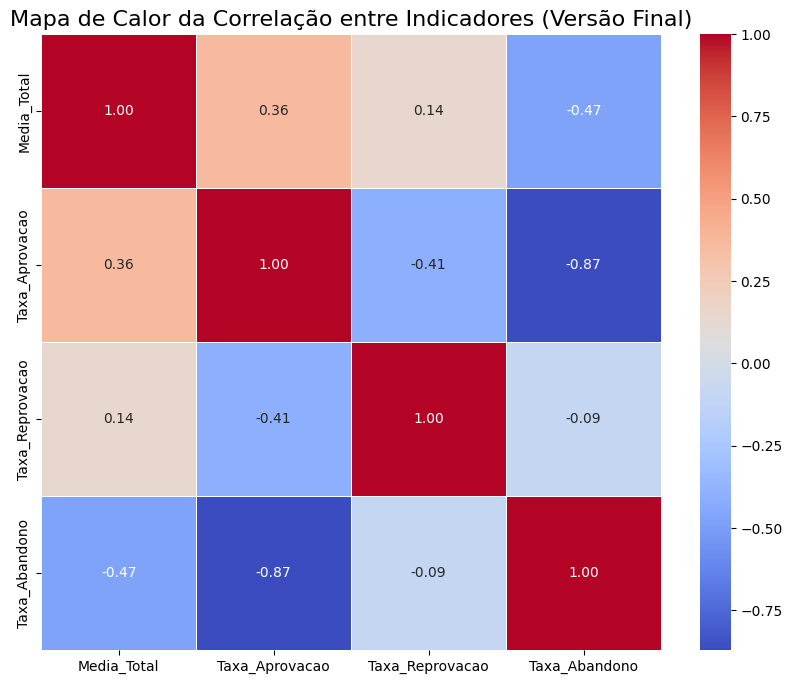

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

print("--- Gerando o Mapa de Calor Definitivo ---")

colunas_interesse = ['Media_Total', 'Taxa_Aprovacao', 'Taxa_Reprovacao', 'Taxa_Abandono']
# O cálculo correto, como verificado por nós:
matriz_correlacao = df_filtrado[colunas_interesse].dropna().corr()

plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mapa de Calor da Correlação entre Indicadores (Versão Final)', fontsize=16)
plt.show()

--- Gerando Gráfico 1: Gráfico de Dispersão ---


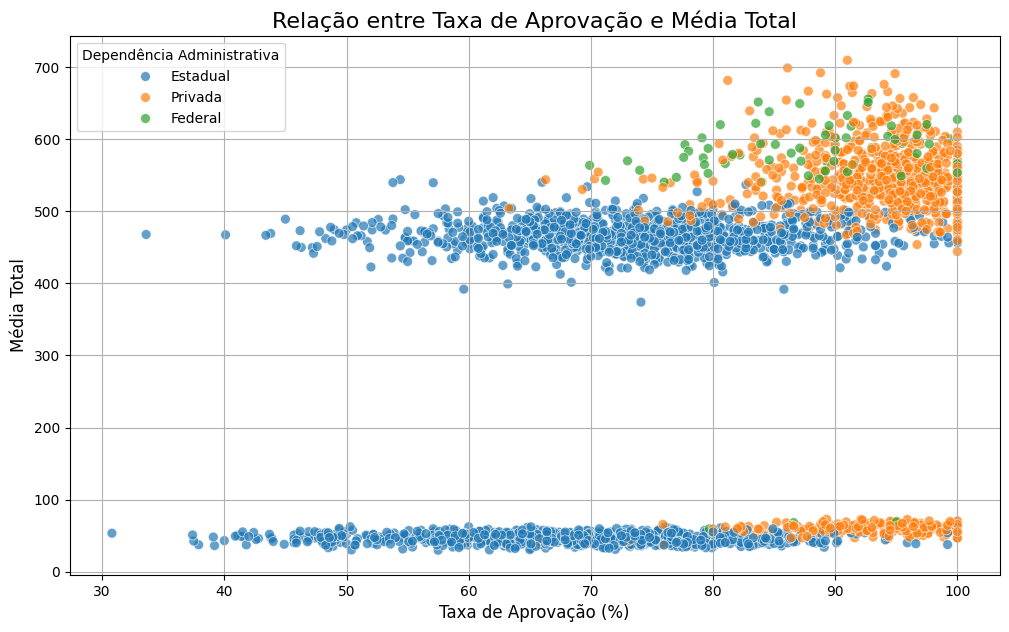



--- Gerando Gráfico 2: Gráfico de Regressão Linear ---


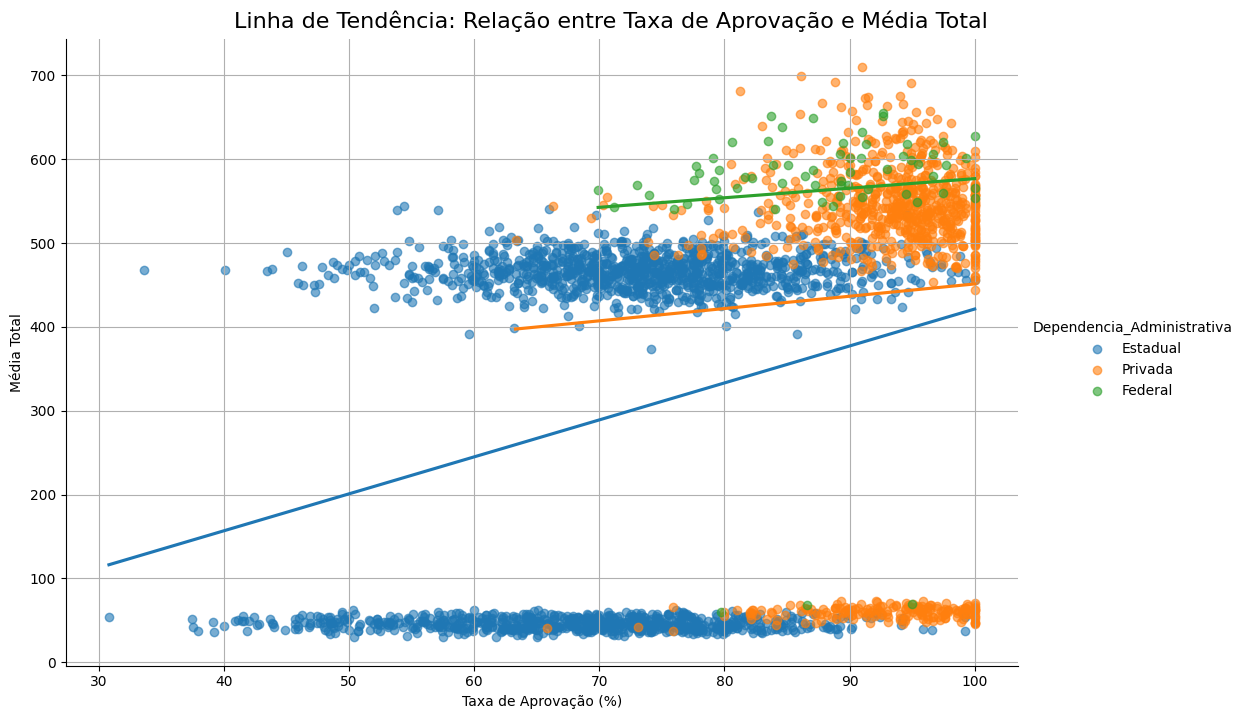



--- Gerando Gráfico 3: Mapa de Calor da Correlação ---


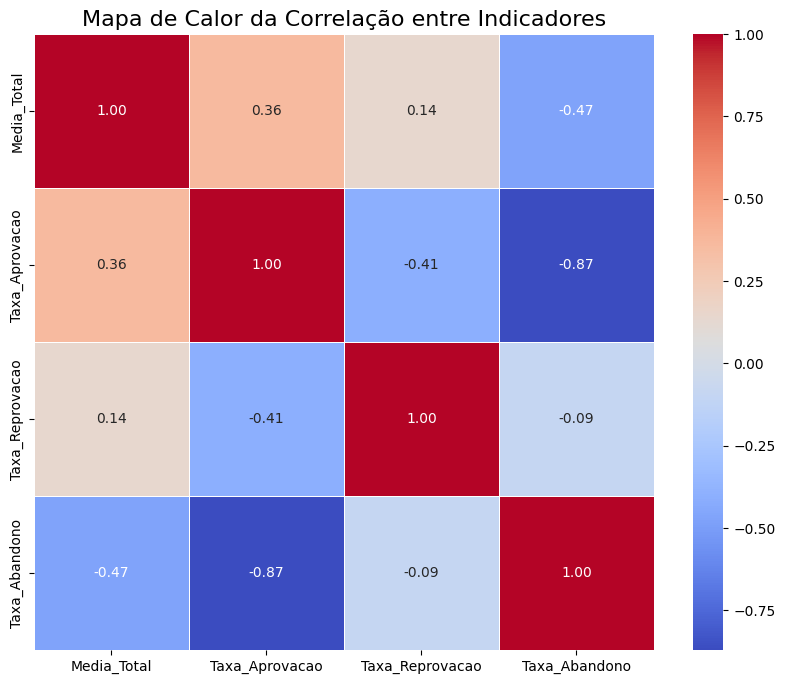

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lembre-se que 'df_filtrado' é o DataFrame com as 3 redes principais.

# --- GRÁFICO 1: GRÁFICO DE DISPERSÃO ---
print("--- Gerando Gráfico 1: Gráfico de Dispersão ---")
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df_filtrado, x='Taxa_Aprovacao', y='Media_Total', hue='Dependencia_Administrativa', alpha=0.7, s=50)
plt.title('Relação entre Taxa de Aprovação e Média Total', fontsize=16)
plt.xlabel('Taxa de Aprovação (%)', fontsize=12)
plt.ylabel('Média Total', fontsize=12)
plt.grid(True)
plt.legend(title='Dependência Administrativa')
plt.show()


# --- GRÁFICO 2: GRÁFICO DE REGRESSÃO LINEAR ---
print("\n\n--- Gerando Gráfico 2: Gráfico de Regressão Linear ---")
g = sns.lmplot(data=df_filtrado, x='Taxa_Aprovacao', y='Media_Total', hue='Dependencia_Administrativa',
               height=7, aspect=1.5, scatter_kws={'alpha':0.6}, ci=None)
g.fig.suptitle('Linha de Tendência: Relação entre Taxa de Aprovação e Média Total', fontsize=16, y=1.02)
g.set_axis_labels('Taxa de Aprovação (%)', 'Média Total')
plt.grid(True)
plt.show()


# --- GRÁFICO 3: MAPA DE CALOR DA CORRELAÇÃO ---
print("\n\n--- Gerando Gráfico 3: Mapa de Calor da Correlação ---")
colunas_interesse = ['Media_Total', 'Taxa_Aprovacao', 'Taxa_Reprovacao', 'Taxa_Abandono']
matriz_correlacao = df_filtrado[colunas_interesse].dropna().corr()

plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mapa de Calor da Correlação entre Indicadores', fontsize=16)
plt.show()

--- Gerando Gráfico para a nova Seção 3.1: Histograma da Média Total ---


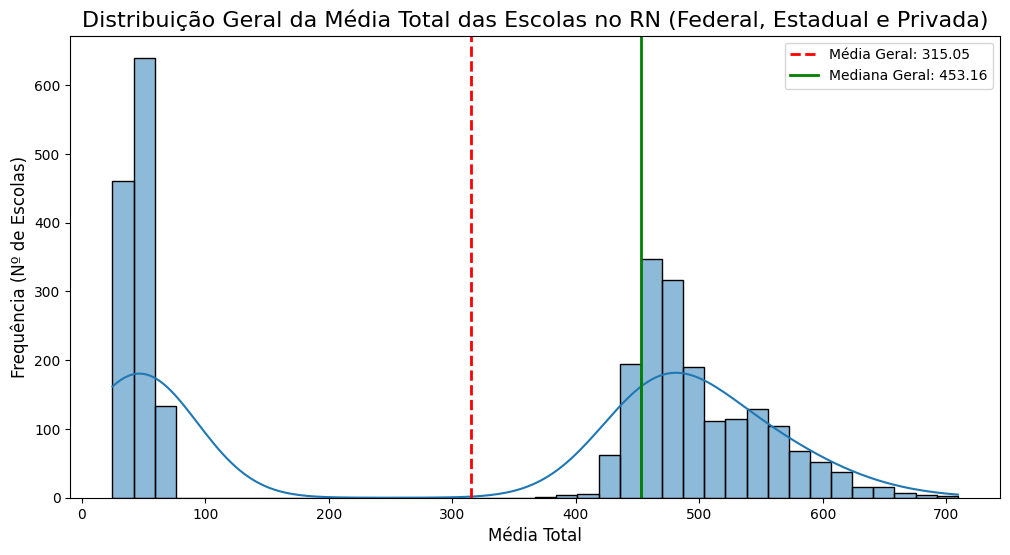

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

print("--- Gerando Gráfico para a nova Seção 3.1: Histograma da Média Total ---")

# Usando o df_filtrado que contém as 3 redes principais
plt.figure(figsize=(12, 6))
sns.histplot(data=df_filtrado, x='Media_Total', bins=40, kde=True) # Aumentar os bins para mais detalhe

# Adicionando linhas verticais para a média e a mediana do conjunto filtrado
media_geral = df_filtrado['Media_Total'].mean()
mediana_geral = df_filtrado['Media_Total'].median()

plt.axvline(media_geral, color='red', linestyle='--', linewidth=2, label=f"Média Geral: {media_geral:.2f}")
plt.axvline(mediana_geral, color='green', linestyle='-', linewidth=2, label=f"Mediana Geral: {mediana_geral:.2f}")

# Títulos e legendas
plt.title('Distribuição Geral da Média Total das Escolas no RN (Federal, Estadual e Privada)', fontsize=16)
plt.xlabel('Média Total', fontsize=12)
plt.ylabel('Frequência (Nº de Escolas)', fontsize=12)
plt.legend()
plt.show()

In [24]:
# Para executar este código, precisamos recriar o primeiro df_analise temporariamente
# para fins de comparação.

# Cenário 1: O DataFrame ORIGINAL, com apenas 942 escolas
df_analise_original = df_tratado.dropna(subset=['Media_Total'])
print("--- CENÁRIO 1: Análise com Dados Originais Incompletos (942 escolas) ---")
display(df_analise_original['Media_Total'].describe())


# Cenário 2: O DataFrame ATUAL, após nosso tratamento (3.036 escolas)
print("\n\n--- CENÁRIO 2: Análise com Dados Tratados e Completos (3.036 escolas) ---")
display(df_filtrado['Media_Total'].describe())

--- CENÁRIO 1: Análise com Dados Originais Incompletos (942 escolas) ---


count    942.000000
mean      43.494533
std        7.830294
min       24.790000
25%       38.162500
50%       41.605000
75%       47.250000
max       73.040000
Name: Media_Total, dtype: float64



--- CENÁRIO 2: Análise com Dados Tratados e Completos (3.036 escolas) ---


count    3014.000000
mean      315.051953
std       227.143330
min        24.790000
25%        48.650000
50%       453.160000
75%       495.463500
max       709.324000
Name: Media_Total, dtype: float64

In [25]:
import pandas as pd
import numpy as np

# --- Relembrando: df_tratado é o nosso DataFrame após renomear as colunas ---
# Se o df_tratado não estiver definido, rode novamente as células de carregamento e renomeação.

print("--- Iniciando o Tratamento de Dados Corrigido ---")

# 1. Calcular a Média a partir das 5 notas (que já está na Escala 0-1000)
colunas_de_notas = ['Media_Ciencias_Natureza', 'Media_Ciencias_Humanas', 'Media_Linguagens_Codigos', 'Media_Matematica', 'Media_Redacao']
media_calculada = df_tratado[colunas_de_notas].mean(axis=1)


# 2. CORREÇÃO DE ESCALA: Multiplicar a Media_Total original por 10
# Isso padroniza a coluna original para a escala 0-1000.
media_original_ajustada = df_tratado['Media_Total'] * 10


# 3. Unificar os dados na escala correta em uma nova coluna final
# Começamos com a média original ajustada
df_tratado['Media_Total_Corrigida'] = media_original_ajustada
# Agora, preenchemos os valores que estavam vazios com a nossa média calculada
df_tratado['Media_Total_Corrigida'].fillna(media_calculada, inplace=True)


# 4. Criar o DataFrame final para análise, focado nas 3 redes e sem valores nulos na nova média
redes_de_interesse = ['Federal', 'Estadual', 'Privada']
df_final_corrigido = df_tratado[df_tratado['Dependencia_Administrativa'].isin(redes_de_interesse)]
df_final_corrigido = df_final_corrigido.dropna(subset=['Media_Total_Corrigida'])


# --- Verificação Final ---
print("\n--- Análise com Dados Corrigidos e Harmonizados ---")
print(f"Total de escolas no DataFrame final corrigido: {len(df_final_corrigido)}")
display(df_final_corrigido['Media_Total_Corrigida'].describe())

--- Iniciando o Tratamento de Dados Corrigido ---

--- Análise com Dados Corrigidos e Harmonizados ---
Total de escolas no DataFrame final corrigido: 3014


/tmp/ipython-input-25-3902251704.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_tratado['Media_Total_Corrigida'].fillna(media_calculada, inplace=True)


count    3014.000000
mean      433.993851
std       146.389129
min        41.250000
25%       413.125000
50%       465.981000
75%       510.127000
max       730.400000
Name: Media_Total_Corrigida, dtype: float64

--- Gerando Gráfico para a Seção 3.1: Histograma da Média Total ---


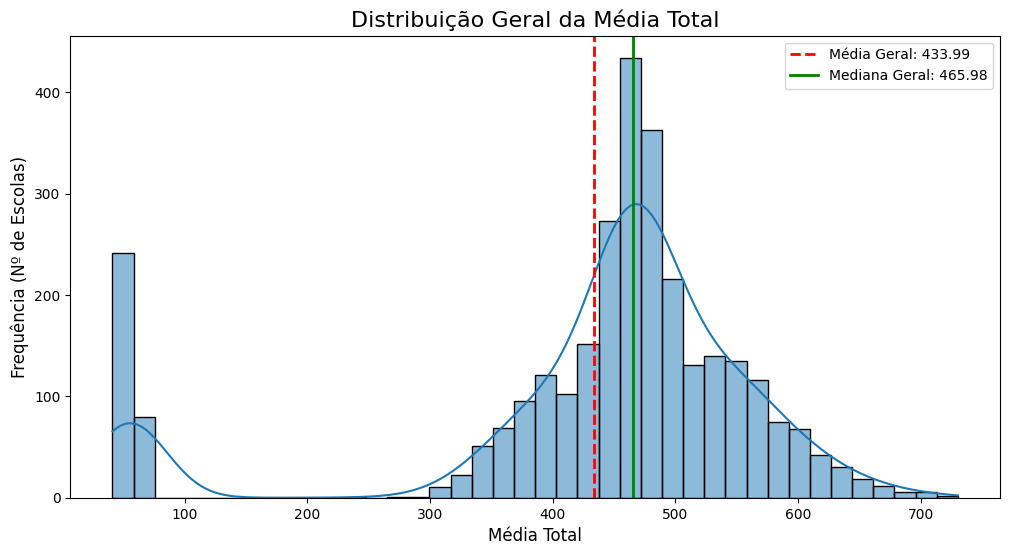



--- Gerando Gráfico para a Seção 3.2: Boxplot Agrupado por Disciplina ---


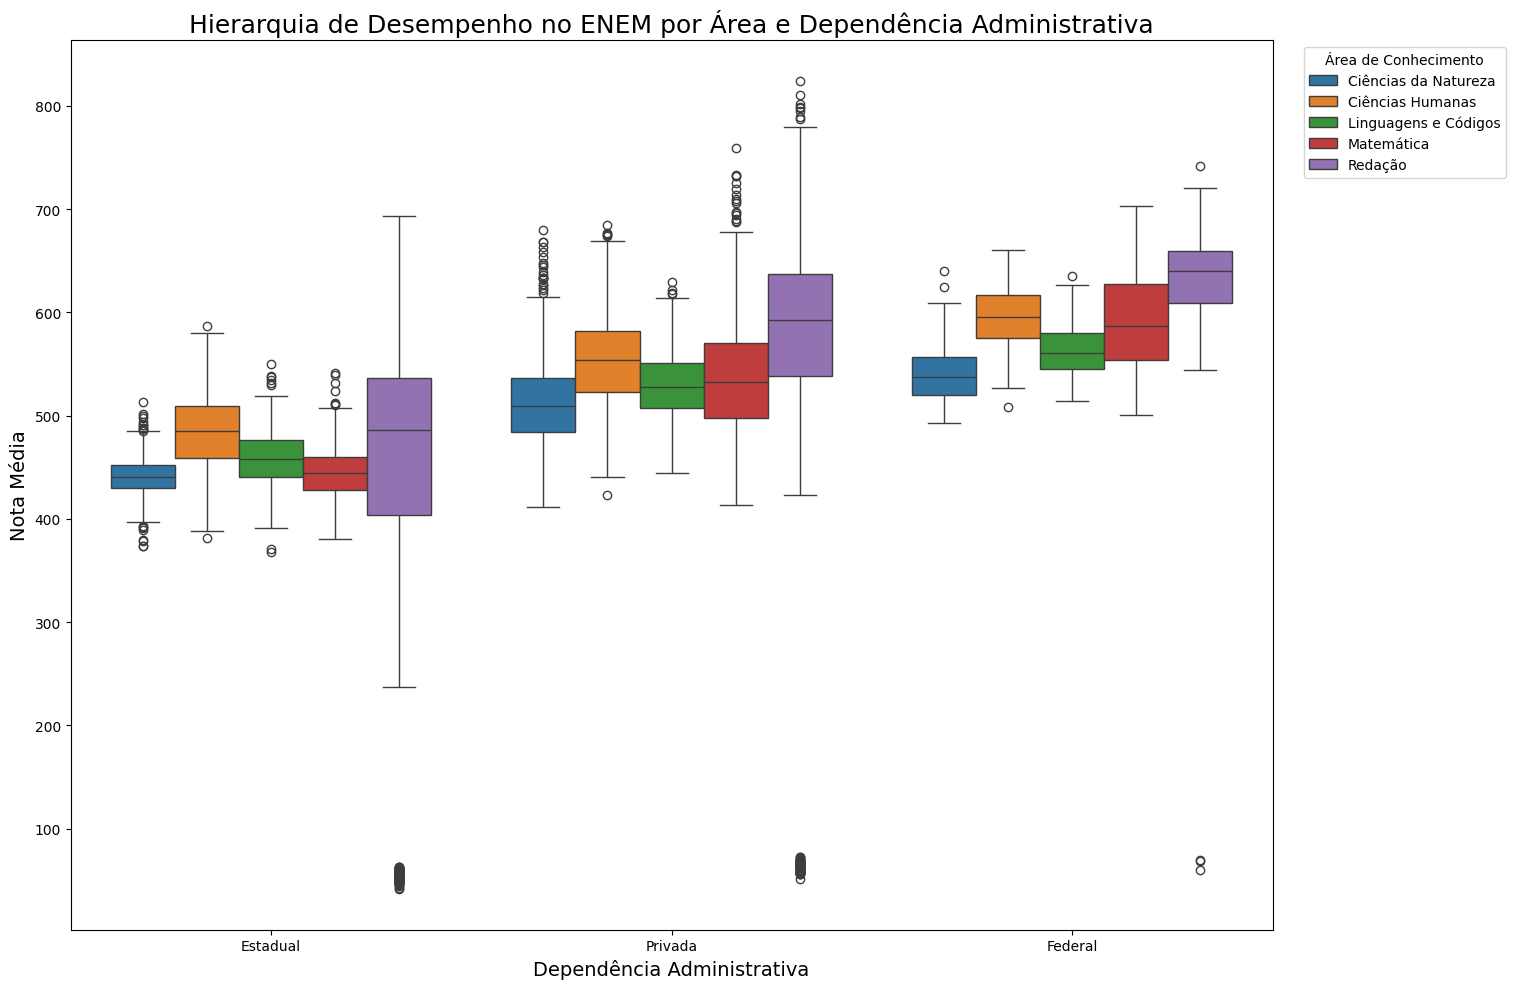



--- Gerando Gráficos para a Seção 3.3: Dispersão e Mapa de Calor ---


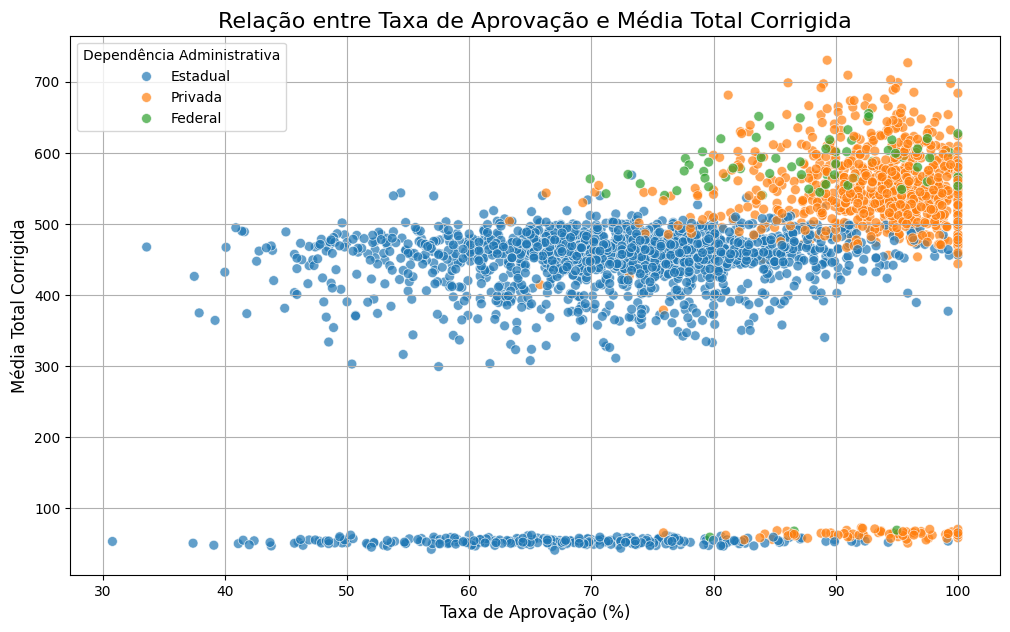

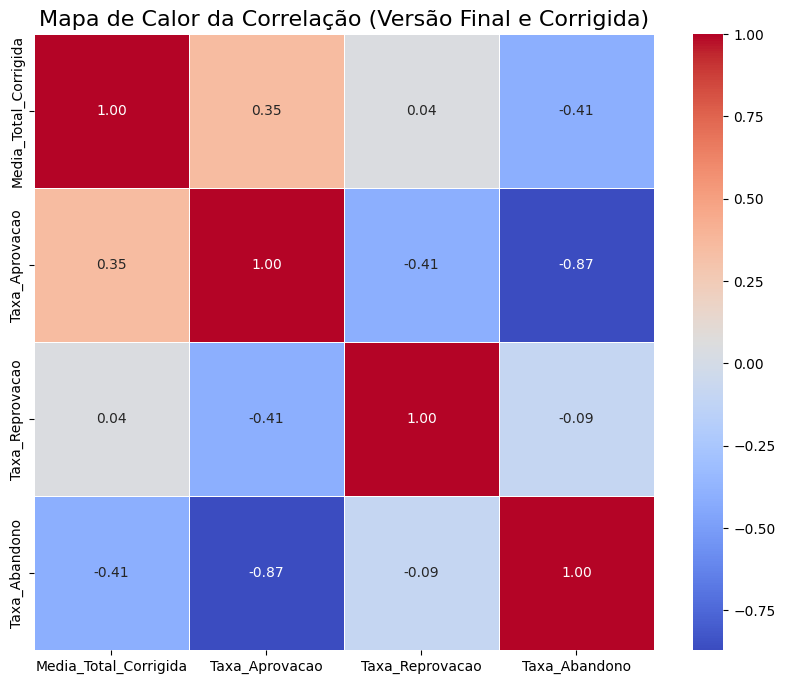

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# DataFrame final: df_final_corrigido

# --- GRÁFICO PARA SEÇÃO 3.1: Histograma da Distribuição Geral ---
print("--- Gerando Gráfico para a Seção 3.1: Histograma da Média Total ---")
plt.figure(figsize=(12, 6))
sns.histplot(data=df_final_corrigido, x='Media_Total_Corrigida', bins=40, kde=True)
media_geral = df_final_corrigido['Media_Total_Corrigida'].mean()
mediana_geral = df_final_corrigido['Media_Total_Corrigida'].median()
plt.axvline(media_geral, color='red', linestyle='--', linewidth=2, label=f"Média Geral: {media_geral:.2f}")
plt.axvline(mediana_geral, color='green', linestyle='-', linewidth=2, label=f"Mediana Geral: {mediana_geral:.2f}")
plt.title('Distribuição Geral da Média Total', fontsize=16)
plt.xlabel('Média Total', fontsize=12)
plt.ylabel('Frequência (Nº de Escolas)', fontsize=12)
plt.legend()
plt.show()


# --- GRÁFICO PARA SEÇÃO 3.2: Boxplot Agrupado por Disciplina ---
print("\n\n--- Gerando Gráfico para a Seção 3.2: Boxplot Agrupado por Disciplina ---")
colunas_de_notas = ['Media_Ciencias_Natureza', 'Media_Ciencias_Humanas', 'Media_Linguagens_Codigos', 'Media_Matematica', 'Media_Redacao']
df_longo = pd.melt(df_final_corrigido, id_vars=['Dependencia_Administrativa'], value_vars=colunas_de_notas, var_name='Area_de_Conhecimento', value_name='Nota_Media')
nomes_amigaveis = {'Media_Ciencias_Natureza': 'Ciências da Natureza', 'Media_Ciencias_Humanas': 'Ciências Humanas', 'Media_Linguagens_Codigos': 'Linguagens e Códigos', 'Media_Matematica': 'Matemática', 'Media_Redacao': 'Redação'}
df_longo['Area_de_Conhecimento'] = df_longo['Area_de_Conhecimento'].map(nomes_amigaveis)
plt.figure(figsize=(18, 10))
sns.boxplot(data=df_longo, x='Dependencia_Administrativa', y='Nota_Media', hue='Area_de_Conhecimento')
plt.title('Hierarquia de Desempenho no ENEM por Área e Dependência Administrativa', fontsize=18)
plt.xlabel('Dependência Administrativa', fontsize=14)
plt.ylabel('Nota Média', fontsize=14)
plt.legend(title='Área de Conhecimento', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()


# --- GRÁFICOS PARA SEÇÃO 3.3: Correlação (Dispersão e Mapa de Calor) ---
print("\n\n--- Gerando Gráficos para a Seção 3.3: Dispersão e Mapa de Calor ---")
# Gráfico de Dispersão
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df_final_corrigido, x='Taxa_Aprovacao', y='Media_Total_Corrigida', hue='Dependencia_Administrativa', alpha=0.7, s=50)
plt.title('Relação entre Taxa de Aprovação e Média Total Corrigida', fontsize=16)
plt.xlabel('Taxa de Aprovação (%)', fontsize=12)
plt.ylabel('Média Total Corrigida', fontsize=12)
plt.grid(True)
plt.legend(title='Dependência Administrativa')
plt.show()

# Mapa de Calor com os valores de correlação FINAIS e CORRETOS
colunas_interesse = ['Media_Total_Corrigida', 'Taxa_Aprovacao', 'Taxa_Reprovacao', 'Taxa_Abandono']
matriz_correlacao = df_final_corrigido[colunas_interesse].dropna().corr()
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mapa de Calor da Correlação (Versão Final e Corrigida)', fontsize=16)
plt.show()

Número de escolas antes do filtro de sanidade: 3014
Número de escolas após remover as notas atípicas: 2690

Gerando o histograma com os dados finais...


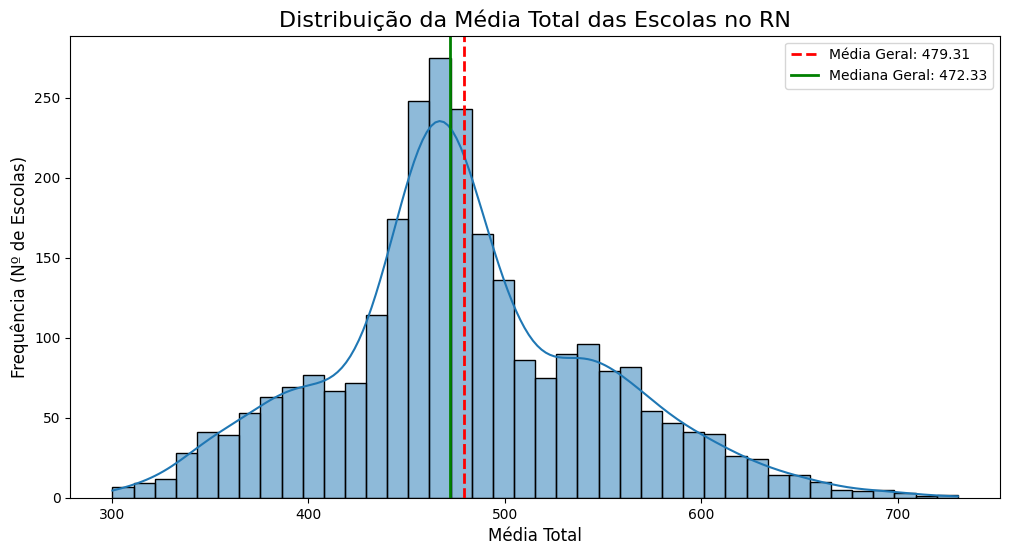

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lembre-se que 'df_final_corrigido' é o nosso DataFrame com a escala já corrigida.
print(f"Número de escolas antes do filtro de sanidade: {len(df_final_corrigido)}")

# Aplicando o filtro final para remover notas implausivelmente baixas
df_versao_publicacao = df_final_corrigido[df_final_corrigido['Media_Total_Corrigida'] > 300].copy()

print(f"Número de escolas após remover as notas atípicas: {len(df_versao_publicacao)}")

# --- Gerando o Histograma Final para Publicação ---
print("\nGerando o histograma com os dados finais...")
plt.figure(figsize=(12, 6))
sns.histplot(data=df_versao_publicacao, x='Media_Total_Corrigida', bins=40, kde=True)

media_geral = df_versao_publicacao['Media_Total_Corrigida'].mean()
mediana_geral = df_versao_publicacao['Media_Total_Corrigida'].median()

plt.axvline(media_geral, color='red', linestyle='--', linewidth=2, label=f"Média Geral: {media_geral:.2f}")
plt.axvline(mediana_geral, color='green', linestyle='-', linewidth=2, label=f"Mediana Geral: {mediana_geral:.2f}")

plt.title('Distribuição da Média Total das Escolas no RN', fontsize=16)
plt.xlabel('Média Total', fontsize=12)
plt.ylabel('Frequência (Nº de Escolas)', fontsize=12)
plt.legend()
plt.show()

In [29]:
print("--- Explorando a distribuição de dados ao longo dos anos ---")

# Vamos usar o nome da coluna correto ('Ano') que definimos no tratamento
try:
    contagem_por_ano = df_versao_publicacao['Ano'].value_counts().sort_index()
    print("Contagem de escolas por ano em nosso dataset final:")
    print(contagem_por_ano)

except KeyError:
    print("\nERRO: A coluna 'Ano' não foi encontrada.")
    print("Isso indica que o seu DataFrame 'df_versao_publicacao' não passou pela etapa de renomeação.")
    print("Por favor, rode novamente a célula de 'Tratamento de Dados Corrigido' que enviei anteriormente e, em seguida, tente esta célula novamente.")

--- Explorando a distribuição de dados ao longo dos anos ---
Contagem de escolas por ano em nosso dataset final:
Ano
2005    280
2006    318
2007    312
2009    313
2010    346
2011    136
2012    194
2013    255
2014    270
2015    266
Name: count, dtype: int64


--- Etapa 2: Calculando e Plotando a Evolução das Notas ---

Tabela com a média de nota por ano e por rede:


Dependencia_Administrativa    Estadual     Federal     Privada
Ano                                                           
2005                        389.395982         NaN  542.625000
2006                        375.448980         NaN  500.000000
2007                        452.864082         NaN  603.661194
2009                        464.292365  601.312500  551.355570
2010                        475.661768  621.862667  561.597897
2011                        453.840884  596.254800  543.707409
2012                        456.956108  590.901600  537.271396
2013                        460.953037  571.473667  540.968556
2014                        458.851772  588.906933  544.177528
2015                        475.049691  572.804533  554.759333

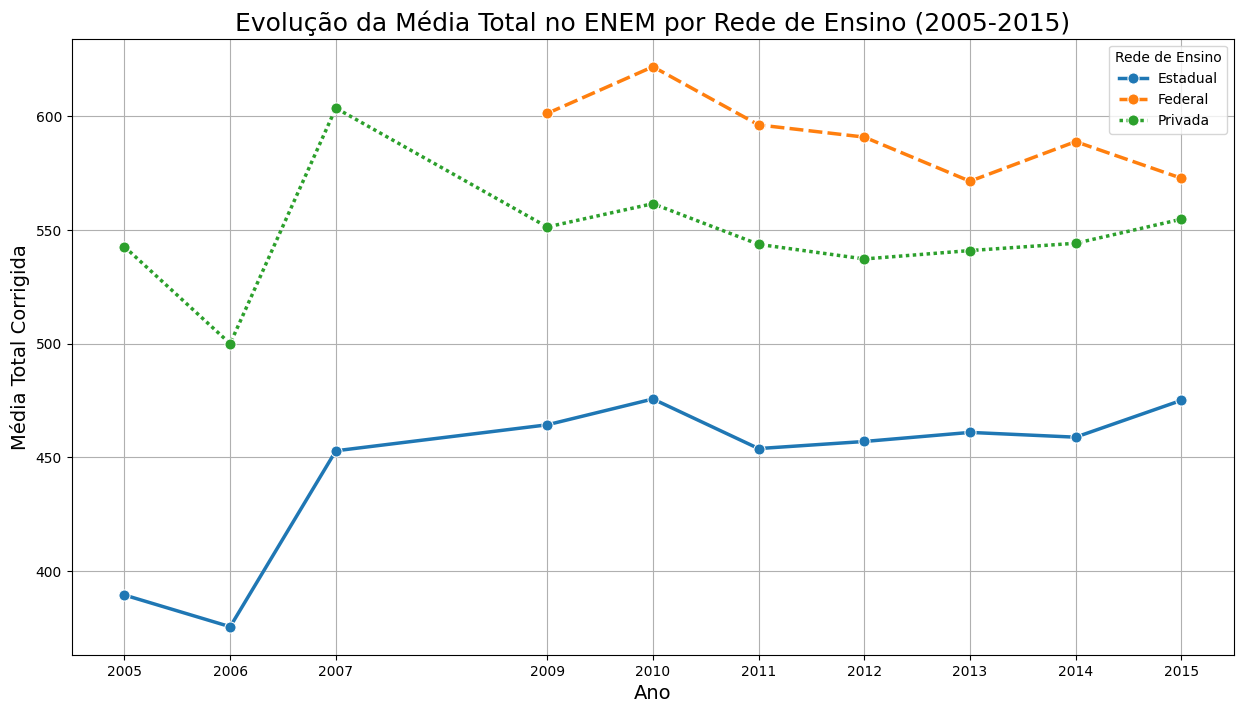

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("--- Etapa 2: Calculando e Plotando a Evolução das Notas ---")

# 1. Agrupar os dados por Ano e Dependência, e calcular a média das notas
# O .unstack() reorganiza a tabela para que cada rede de ensino vire uma coluna, facilitando a plotagem
evolucao_notas = df_versao_publicacao.groupby(['Ano', 'Dependencia_Administrativa'])['Media_Total_Corrigida'].mean().unstack()

print("\nTabela com a média de nota por ano e por rede:")
display(evolucao_notas)

# 2. Gerar o Gráfico de Linhas para visualizar a evolução
plt.figure(figsize=(15, 8))
sns.lineplot(data=evolucao_notas, marker='o', linewidth=2.5, markersize=8)

# Títulos e legendas
plt.title('Evolução da Média Total no ENEM por Rede de Ensino (2005-2015)', fontsize=18)
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Média Total Corrigida', fontsize=14)
plt.grid(True)
plt.legend(title='Rede de Ensino')
plt.xticks(evolucao_notas.index) # Garante que todos os anos do nosso dado apareçam no eixo X
plt.show()

--- Preparando dados e gerando o painel de evolução por disciplina ---


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


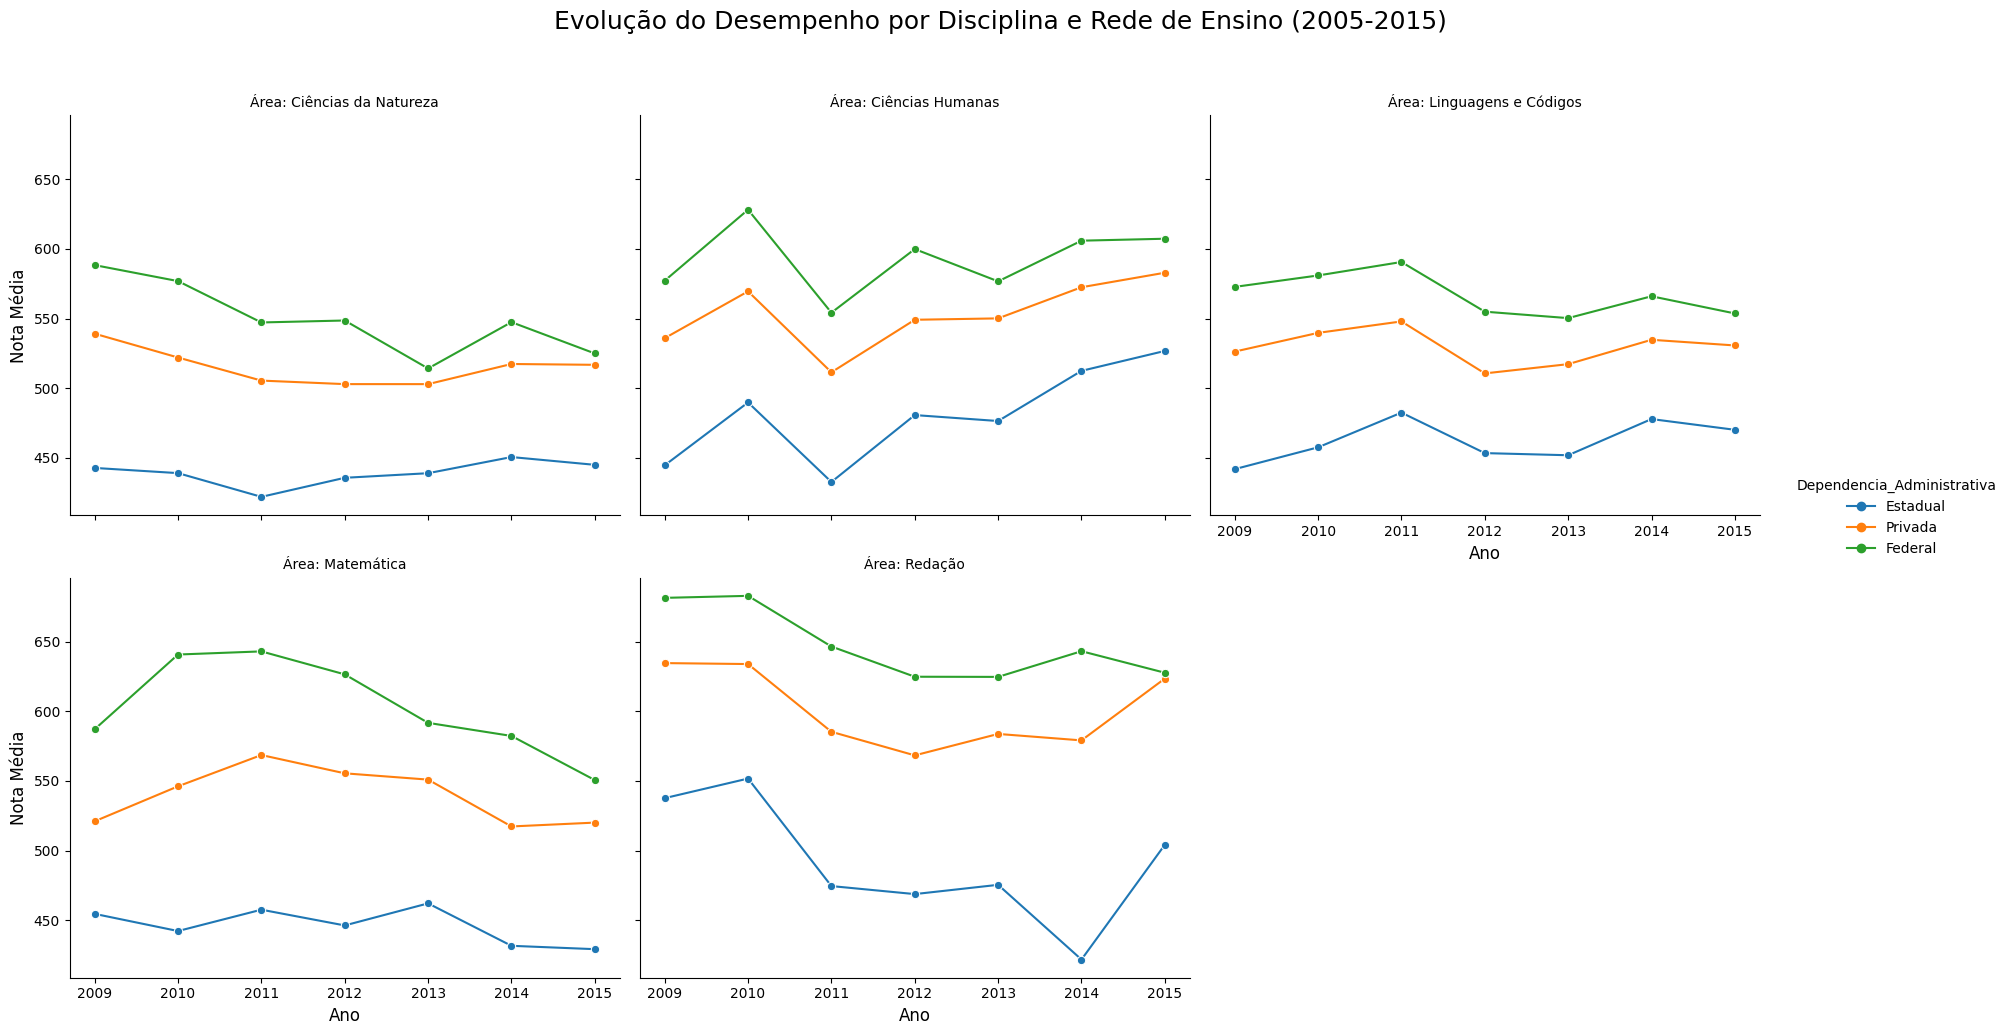

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("--- Preparando dados e gerando o painel de evolução por disciplina ---")

# 1. Definir as colunas de notas que queremos analisar
colunas_de_notas = [
    'Media_Ciencias_Natureza', 'Media_Ciencias_Humanas',
    'Media_Linguagens_Codigos', 'Media_Matematica', 'Media_Redacao'
]

# 2. Reorganizar (melt) os dados para o formato longo, mantendo Ano e Dependencia
# Usaremos o DataFrame 'df_versao_publicacao', que é o nosso dataset mais limpo e final
df_evolucao_disciplinas = pd.melt(df_versao_publicacao,
                                    id_vars=['Ano', 'Dependencia_Administrativa'],
                                    value_vars=colunas_de_notas,
                                    var_name='Area_de_Conhecimento',
                                    value_name='Nota_Media')

# 3. Renomear as áreas para nomes mais amigáveis para usar na legenda do gráfico
nomes_amigaveis = {
    'Media_Ciencias_Natureza': 'Ciências da Natureza',
    'Media_Ciencias_Humanas': 'Ciências Humanas',
    'Media_Linguagens_Codigos': 'Linguagens e Códigos',
    'Media_Matematica': 'Matemática',
    'Media_Redacao': 'Redação'
}
df_evolucao_disciplinas['Area_de_Conhecimento'] = df_evolucao_disciplinas['Area_de_Conhecimento'].map(nomes_amigaveis)


# 4. Criar o painel de gráficos (facet grid) com a função relplot do Seaborn
g = sns.relplot(
    data=df_evolucao_disciplinas,
    x='Ano',
    y='Nota_Media',
    hue='Dependencia_Administrativa',
    col='Area_de_Conhecimento', # Cria uma coluna de gráficos para cada área
    kind='line',                # Define o tipo de gráfico como linha
    marker='o',                 # Adiciona um marcador de ponto em cada ano
    height=5,                   # Altura de cada gráfico individual
    aspect=1.2,                 # Proporção entre largura e altura
    col_wrap=3,                 # Quebra a linha após 3 gráficos, para melhor organização
    ci=None                     # Desliga o intervalo de confiança para um visual mais limpo
)

# Ajustes nos títulos e eixos para uma apresentação profissional
g.fig.suptitle('Evolução do Desempenho por Disciplina e Rede de Ensino (2005-2015)', y=1.03, fontsize=18)
g.set_axis_labels("Ano", "Nota Média", fontsize=12)
g.set_titles("Área: {col_name}", fontsize=14)
g.tight_layout()
plt.show()

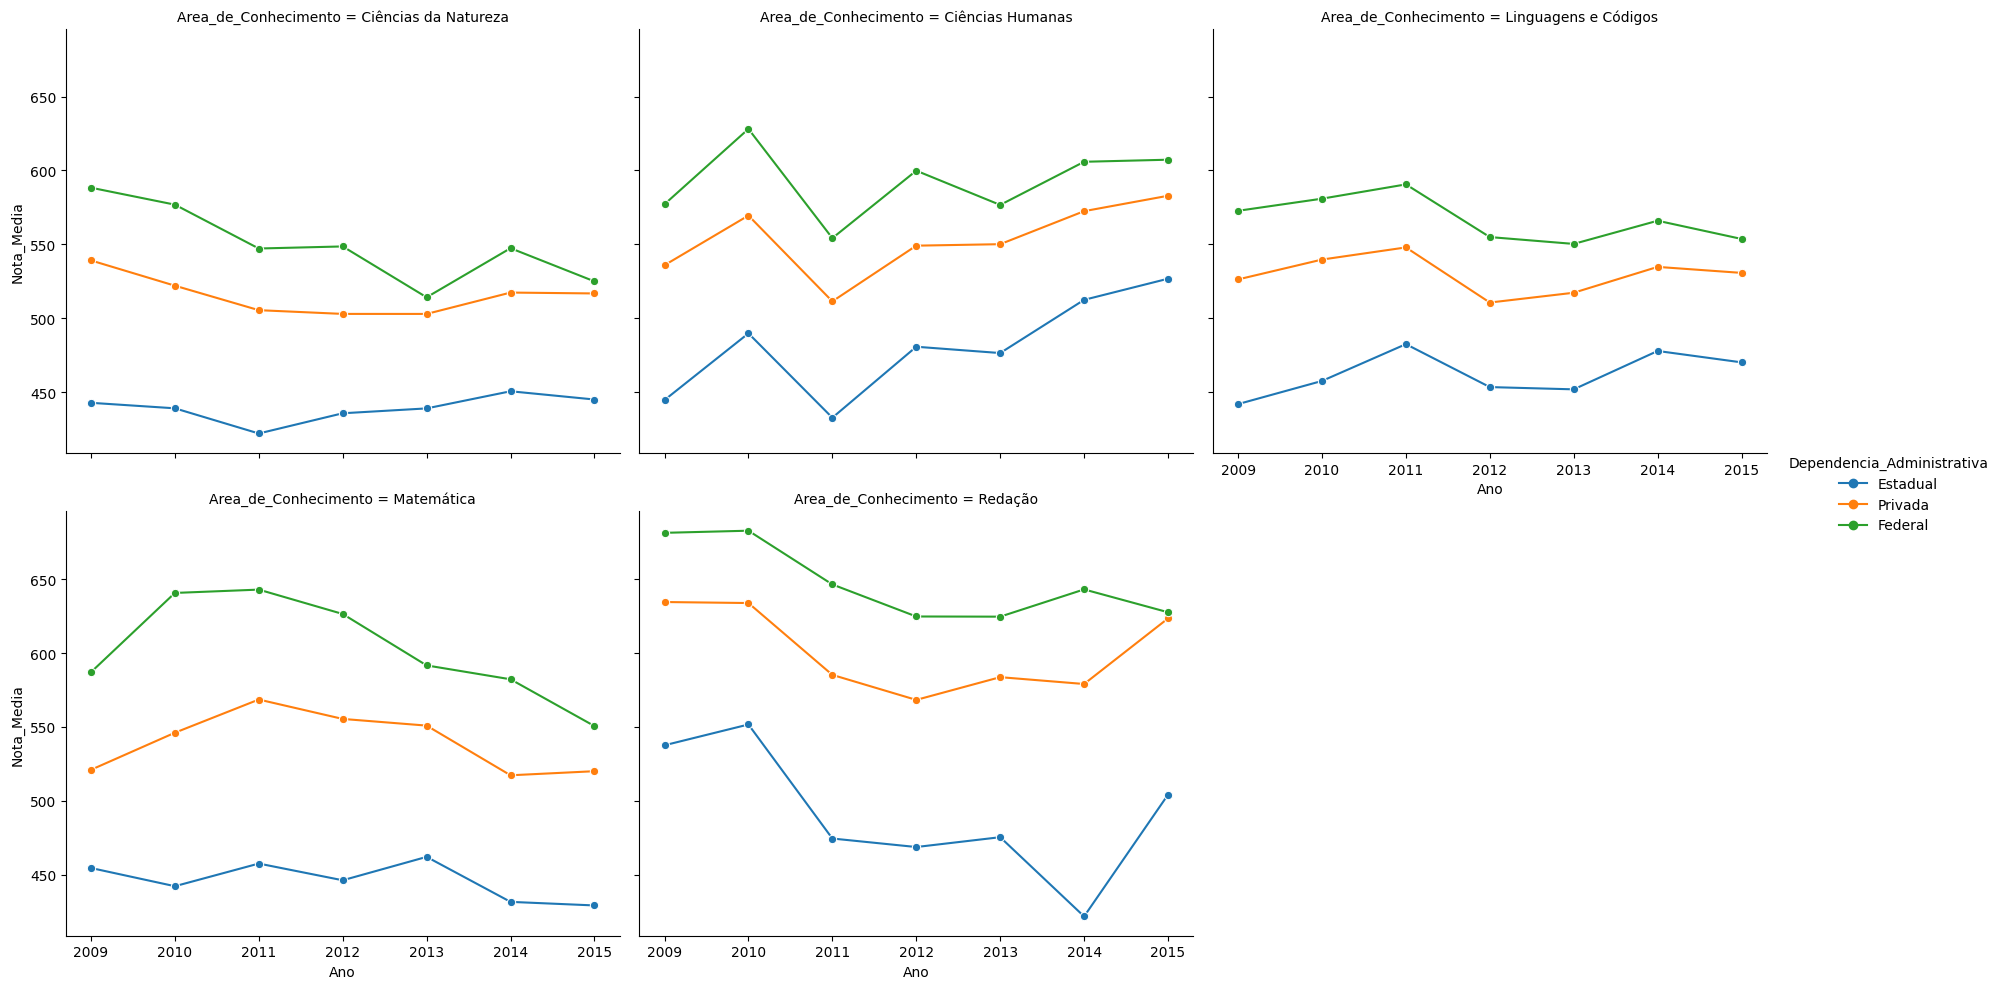

In [32]:
g = sns.relplot(
    data=df_evolucao_disciplinas,
    x='Ano', y='Nota_Media', hue='Dependencia_Administrativa',
    col='Area_de_Conhecimento', kind='line', marker='o',
    height=5, aspect=1.2, col_wrap=3,
    errorbar=None # Correção do parâmetro 'ci'
)
# ... resto do código de formatação ...

--- Ajustando o gráfico para incluir apenas anos com dados da Rede Federal ---
Anos com dados da rede Federal que serão mantidos na análise: [np.int64(2009), np.int64(2010), np.int64(2011), np.int64(2012), np.int64(2013), np.int64(2014), np.int64(2015)]


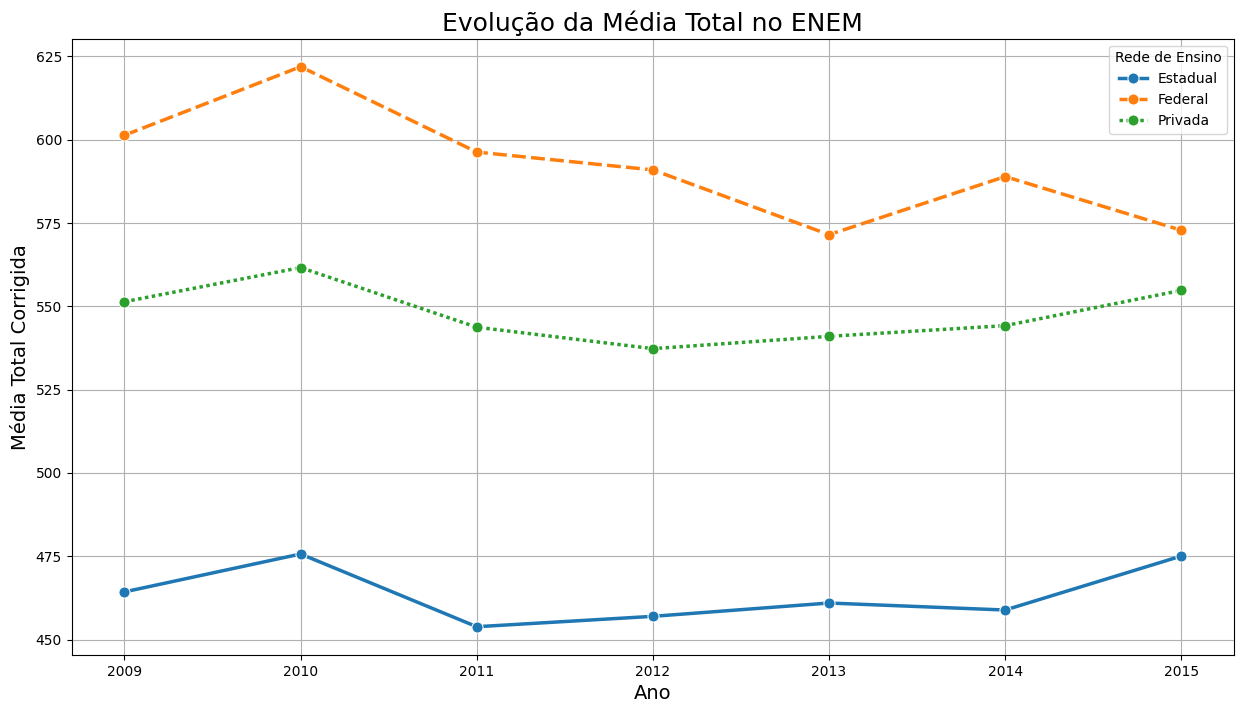

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("--- Ajustando o gráfico para incluir apenas anos com dados da Rede Federal ---")

# 1. Identificar os anos únicos em que a rede Federal TEM dados no nosso dataframe final
anos_com_dados_federais = df_versao_publicacao[df_versao_publicacao['Dependencia_Administrativa'] == 'Federal']['Ano'].unique()
print(f"Anos com dados da rede Federal que serão mantidos na análise: {sorted(anos_com_dados_federais)}")

# 2. Filtrar o DataFrame principal para manter apenas os dados desses anos específicos
df_comparacao_temporal = df_versao_publicacao[df_versao_publicacao['Ano'].isin(anos_com_dados_federais)]

# 3. Recalcular a evolução das notas com o novo DataFrame filtrado
evolucao_filtrada = df_comparacao_temporal.groupby(['Ano', 'Dependencia_Administrativa'])['Media_Total_Corrigida'].mean().unstack()

# 4. Gerar o novo Gráfico de Linhas ajustado
plt.figure(figsize=(15, 8))
sns.lineplot(data=evolucao_filtrada, marker='o', linewidth=2.5, markersize=8)

# Títulos e legendas
plt.title('Evolução da Média Total no ENEM', fontsize=18)
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Média Total Corrigida', fontsize=14)
plt.grid(True)
plt.legend(title='Rede de Ensino')
plt.xticks(evolucao_filtrada.index) # Garante que todos os anos do nosso novo recorte apareçam no eixo X
plt.show()

--- Filtrando para o período de 2009-2015 e gerando gráficos de evolução ---
Análise focada em 1780 registros a partir de 2009.


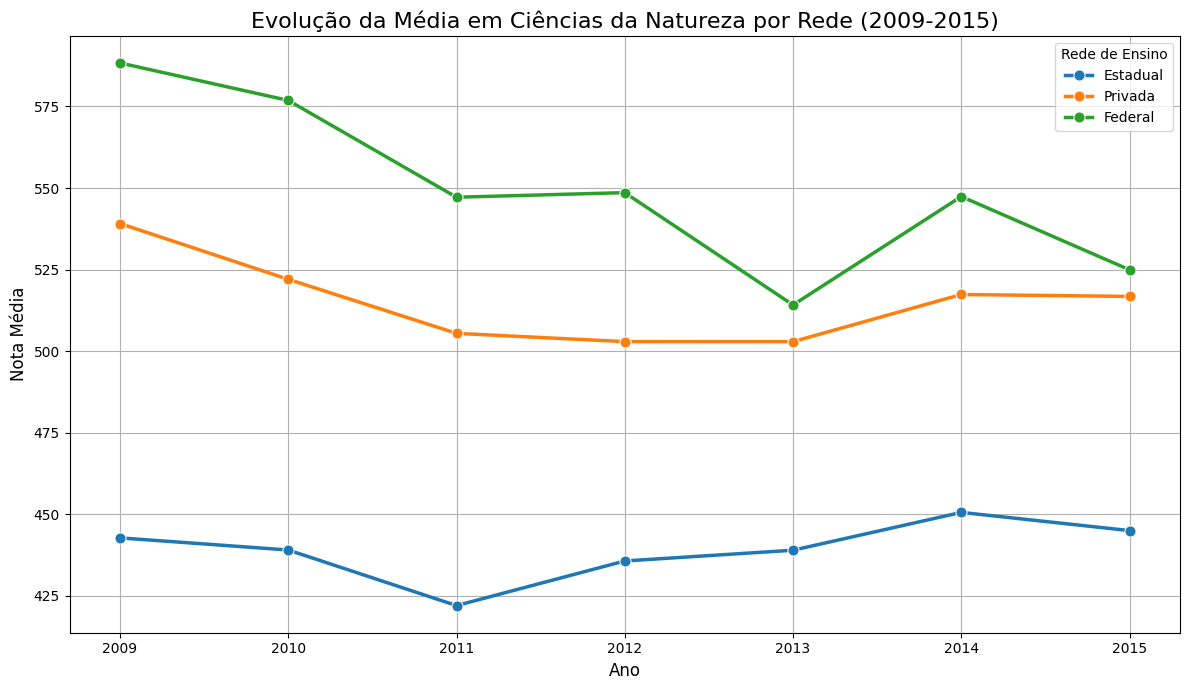

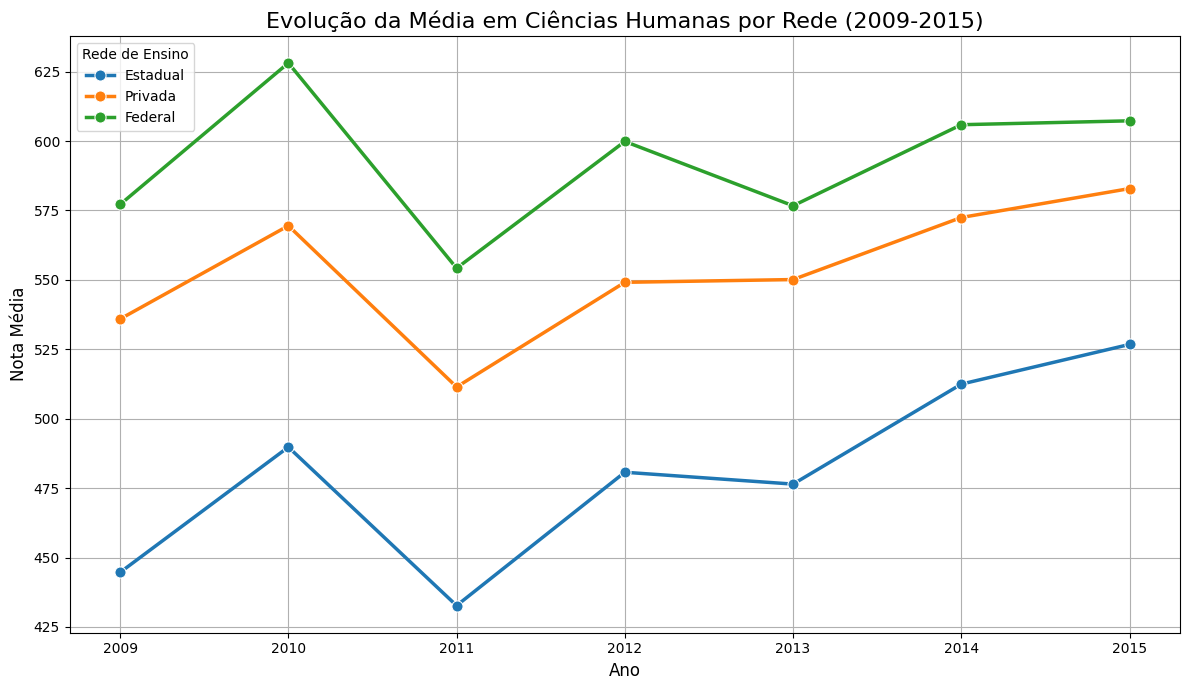

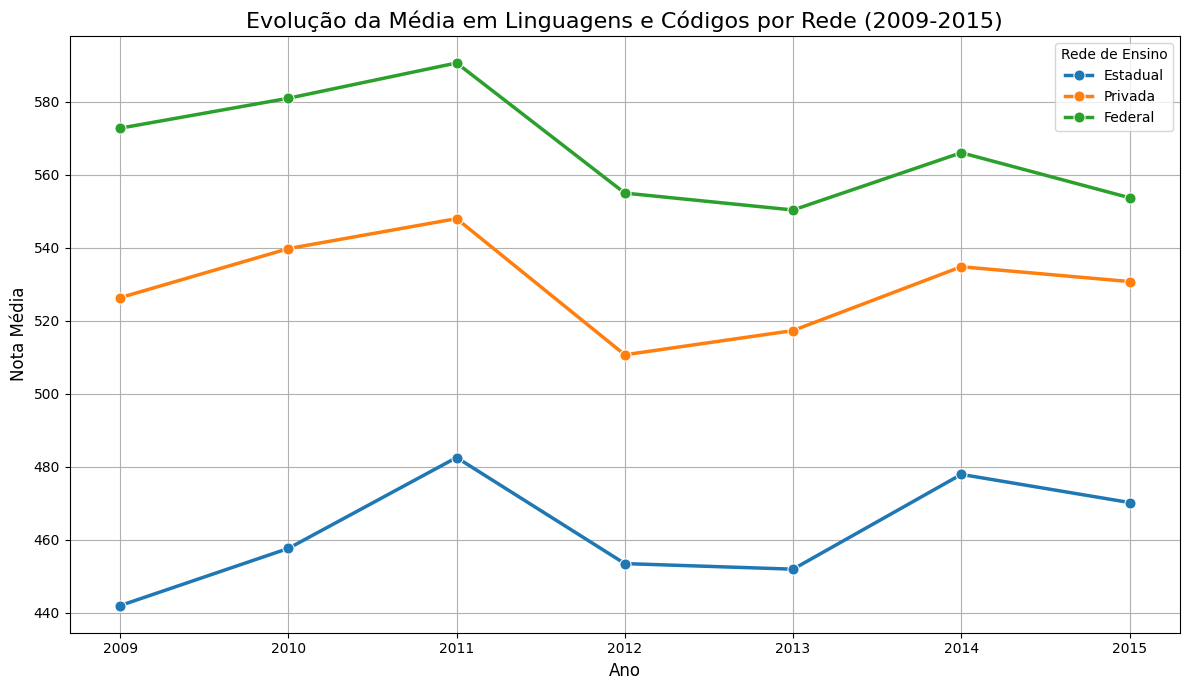

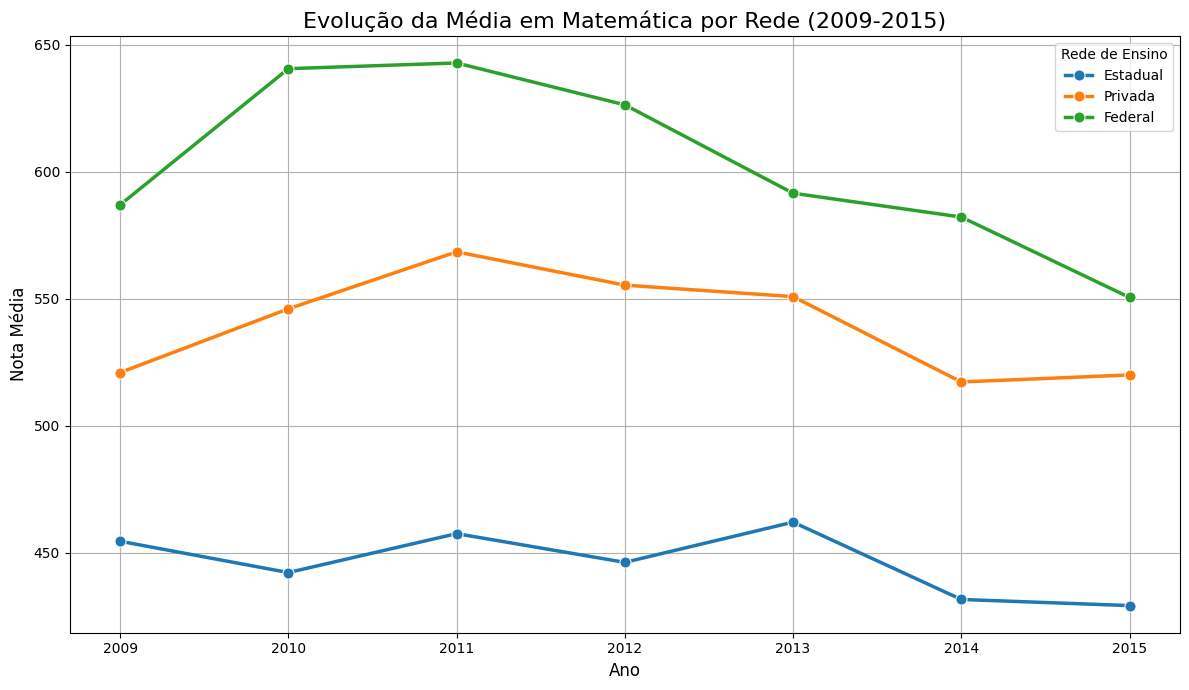

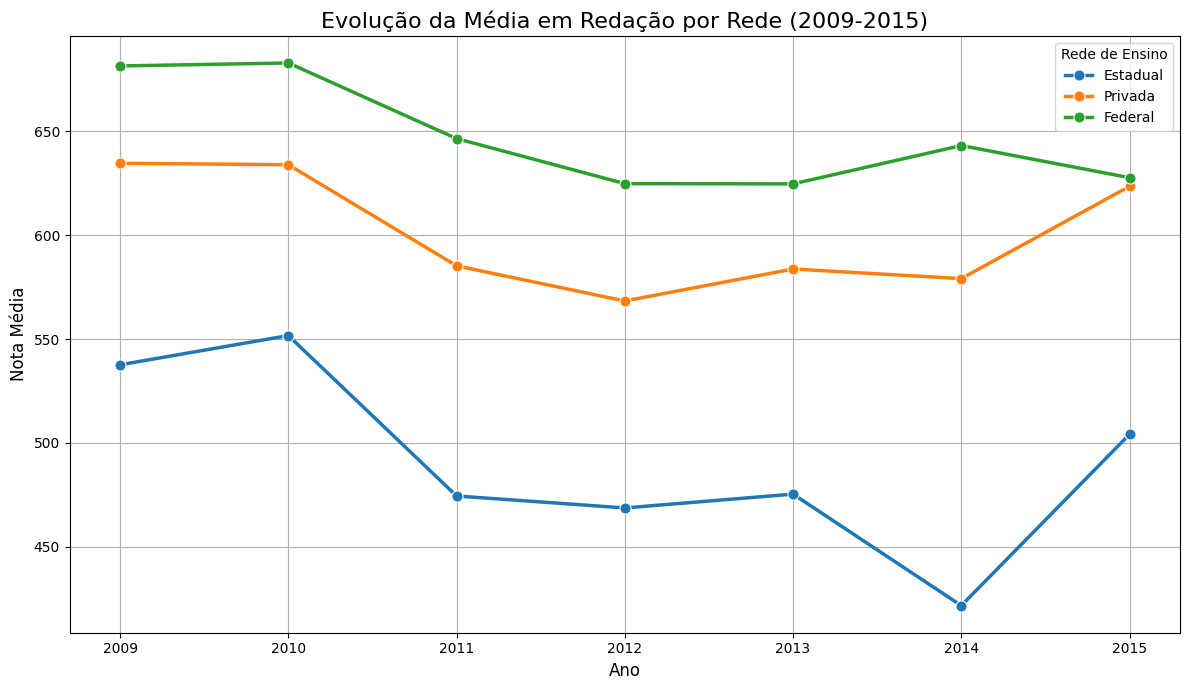

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("--- Filtrando para o período de 2009-2015 e gerando gráficos de evolução ---")

# Etapa 1: Aplicando o filtro de tempo para o período de 2009 a 2015
# Usaremos o DataFrame 'df_versao_publicacao', que é o nosso dataset mais limpo
df_periodo_recente = df_versao_publicacao[df_versao_publicacao['Ano'] >= 2009].copy()
print(f"Análise focada em {len(df_periodo_recente)} registros a partir de 2009.")


# Etapa 2: Preparação dos dados (melt) com o novo dataframe filtrado
colunas_de_notas = [
    'Media_Ciencias_Natureza', 'Media_Ciencias_Humanas',
    'Media_Linguagens_Codigos', 'Media_Matematica', 'Media_Redacao'
]
df_evolucao_recente = pd.melt(df_periodo_recente,
                                 id_vars=['Ano', 'Dependencia_Administrativa'],
                                 value_vars=colunas_de_notas,
                                 var_name='Area_de_Conhecimento',
                                 value_name='Nota_Media')
nomes_amigaveis = {
    'Media_Ciencias_Natureza': 'Ciências da Natureza',
    'Media_Ciencias_Humanas': 'Ciências Humanas',
    'Media_Linguagens_Codigos': 'Linguagens e Códigos',
    'Media_Matematica': 'Matemática',
    'Media_Redacao': 'Redação'
}
df_evolucao_recente['Area_de_Conhecimento'] = df_evolucao_recente['Area_de_Conhecimento'].map(nomes_amigaveis)


# Etapa 3: Loop para gerar um gráfico para cada disciplina
lista_disciplinas = df_evolucao_recente['Area_de_Conhecimento'].unique()

for disciplina in lista_disciplinas:
    plt.figure(figsize=(12, 7)) # Tamanho do gráfico

    dados_disciplina = df_evolucao_recente[df_evolucao_recente['Area_de_Conhecimento'] == disciplina]

    sns.lineplot(
        data=dados_disciplina,
        x='Ano',
        y='Nota_Media',
        hue='Dependencia_Administrativa',
        marker='o',
        linewidth=2.5,
        markersize=8,
        errorbar=None
    )

    # Título atualizado para o novo período
    plt.title(f'Evolução da Média em {disciplina} por Rede (2009-2015)', fontsize=16)
    plt.xlabel('Ano', fontsize=12)
    plt.ylabel('Nota Média', fontsize=12)
    plt.grid(True)
    plt.legend(title='Rede de Ensino')
    plt.xticks(sorted(dados_disciplina['Ano'].unique())) # Garante que todos os anos do período apareçam
    plt.tight_layout()
    plt.show()

--- Gerando o Gráfico de Dispersão Final ---


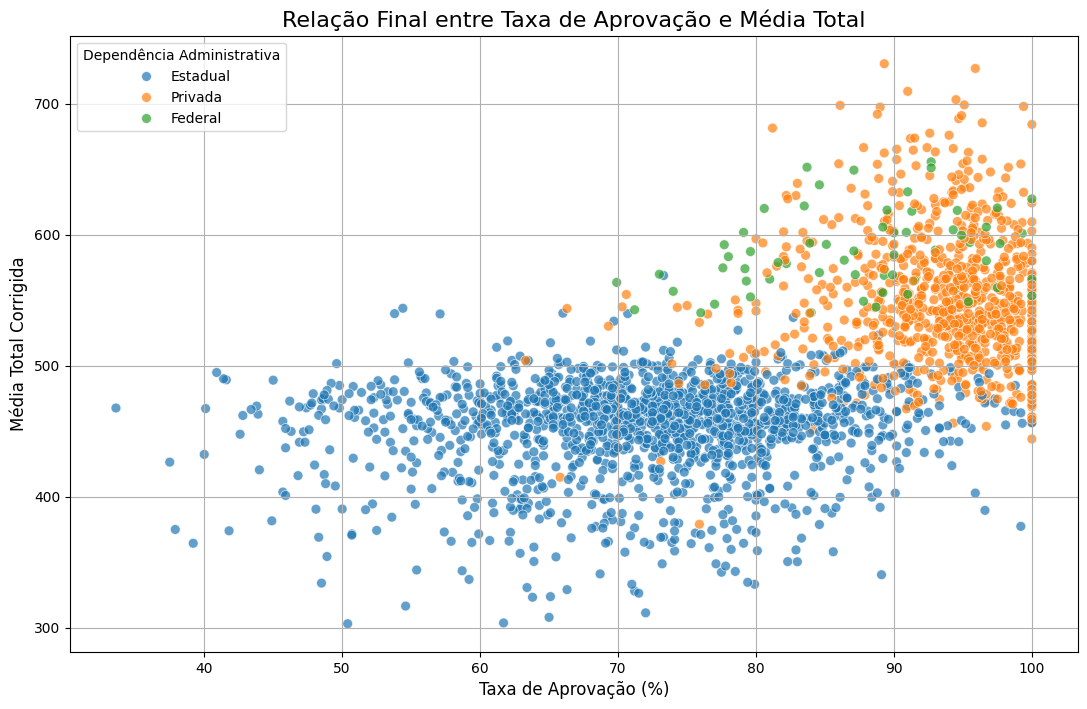

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lembre-se que 'df_versao_publicacao' é o nosso DataFrame mais limpo e final.
# Se ele não estiver definido, rode novamente a célula de tratamento de dados que o cria.

print("--- Gerando o Gráfico de Dispersão Final ---")

plt.figure(figsize=(13, 8)) # Define um bom tamanho para o gráfico

# Criando o gráfico de dispersão com os dados finais e mais limpos
sns.scatterplot(
    data=df_versao_publicacao,
    x='Taxa_Aprovacao',
    y='Media_Total_Corrigida',
    hue='Dependencia_Administrativa',
    alpha=0.7, # Transparência para ver sobreposição de pontos
    s=50       # Tamanho dos pontos para melhor visualização
)

# Títulos e legendas
plt.title('Relação Final entre Taxa de Aprovação e Média Total', fontsize=16)
plt.xlabel('Taxa de Aprovação (%)', fontsize=12)
plt.ylabel('Média Total Corrigida', fontsize=12)
plt.grid(True)
plt.legend(title='Dependência Administrativa')
plt.show()

--- Gerando o Mapa de Calor Final da Correlação entre Indicadores ---


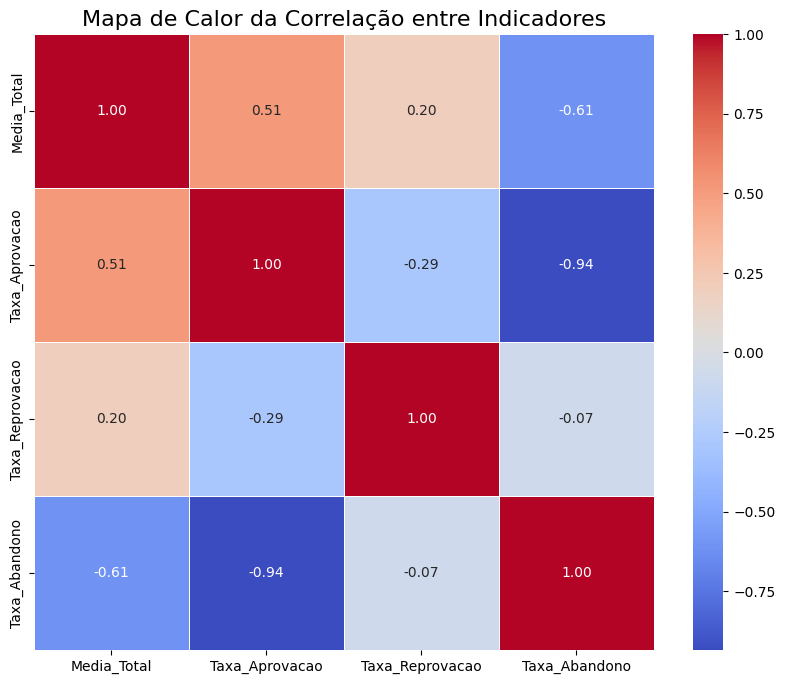


Matriz de Correlação (Valores Exatos):
                 Media_Total  Taxa_Aprovacao  Taxa_Reprovacao  Taxa_Abandono
Media_Total         1.000000        0.512347         0.195270      -0.606706
Taxa_Aprovacao      0.512347        1.000000        -0.291142      -0.935052
Taxa_Reprovacao     0.195270       -0.291142         1.000000      -0.066920
Taxa_Abandono      -0.606706       -0.935052        -0.066920       1.000000


In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lembre-se que 'df_versao_publicacao' é o nosso DataFrame mais limpo e final.
# Se ele não estiver definido, rode novamente a célula de tratamento de dados que o cria.

print("--- Gerando o Mapa de Calor Final da Correlação entre Indicadores ---")

# Selecionando as colunas de interesse para a matriz
colunas_interesse = ['Media_Total', 'Taxa_Aprovacao', 'Taxa_Reprovacao', 'Taxa_Abandono']

# Calculando a matriz de correlação com os dados finais.
# O .dropna() garante que a correlação seja calculada apenas em linhas onde todos esses indicadores estão presentes.
matriz_correlacao_final = df_versao_publicacao[colunas_interesse].dropna().corr()

# Gerando o gráfico de mapa de calor (heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(
    matriz_correlacao_final,
    annot=True,       # Imprime os números dentro dos quadrados
    cmap='coolwarm',    # Esquema de cores (quente para positivo, frio para negativo)
    fmt=".2f",          # Formata os números com duas casas decimais
    linewidths=.5     # Adiciona uma pequena linha entre as células
)

# Títulos
plt.title('Mapa de Calor da Correlação entre Indicadores', fontsize=16)
plt.show()

# Opcional: Imprimir a matriz em formato de texto para fácil referência dos valores exatos
print("\nMatriz de Correlação (Valores Exatos):")
print(matriz_correlacao_final)

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("--- Gerando a tabela quantitativa da evolução das notas (2009-2015) ---")

# Etapa 1: Replicando a preparação de dados do seu código
# Lembre-se que 'df_versao_publicacao' é o nosso DataFrame mais limpo e final
df_periodo_recente = df_versao_publicacao[df_versao_publicacao['Ano'] >= 2009].copy()
colunas_de_notas = [
    'Media_Ciencias_Natureza', 'Media_Ciencias_Humanas',
    'Media_Linguagens_Codigos', 'Media_Matematica', 'Media_Redacao'
]
df_evolucao_recente = pd.melt(df_periodo_recente,
                                 id_vars=['Ano', 'Dependencia_Administrativa'],
                                 value_vars=colunas_de_notas,
                                 var_name='Area_de_Conhecimento',
                                 value_name='Nota_Media')
nomes_amigaveis = {
    'Media_Ciencias_Natureza': 'Ciências da Natureza',
    'Media_Ciencias_Humanas': 'Ciências Humanas',
    'Media_Linguagens_Codigos': 'Linguagens e Códigos',
    'Media_Matematica': 'Matemática',
    'Media_Redacao': 'Redação'
}
df_evolucao_recente['Area_de_Conhecimento'] = df_evolucao_recente['Area_de_Conhecimento'].map(nomes_amigaveis)

# Etapa 2: Agregando os dados para criar a tabela de resumo (a informação quantitativa)
# Aqui calculamos a média da nota para cada combinação de Ano, Área e Rede.
tabela_rendimento_temporal = df_evolucao_recente.pivot_table(
    index=['Ano', 'Area_de_Conhecimento'],
    columns='Dependencia_Administrativa',
    values='Nota_Media',
    aggfunc='mean' # A função de agregação é a média, a mesma que o gráfico de linha usa
).sort_index()

# Etapa 3: Exibindo o DataFrame com os dados quantitativos
print("\nAbaixo está a tabela com a nota média exata para cada grupo, ano a ano:")
# O .style.format formata os números com 2 casas decimais para melhor leitura
display(tabela_rendimento_temporal.style.format("{:.2f}", na_rep="-"))

--- Gerando a tabela quantitativa da evolução das notas (2009-2015) ---

Abaixo está a tabela com a nota média exata para cada grupo, ano a ano:


In [43]:
# Lembre-se que 'df_versao_publicacao' é o nosso DataFrame mais limpo e final.
# Se ele não estiver definido, rode novamente a célula de tratamento de dados que o cria.

print("--- Tabela de Dados para o Gráfico de Dispersão ---")
print("Cada linha representa um ponto no gráfico.\n")

# Selecionando as colunas relevantes para o gráfico
colunas_dispersao = ['Nome_Escola', 'Dependencia_Administrativa', 'Taxa_Aprovacao', 'Media_Total_Corrigida']

# Criando e exibindo o DataFrame, removendo linhas onde os dados do gráfico estariam ausentes
dados_para_dispersao = df_versao_publicacao[colunas_dispersao].dropna()

display(dados_para_dispersao)

--- Tabela de Dados para o Gráfico de Dispersão ---
Cada linha representa um ponto no gráfico.



Nome_Escola  \
0                   EE DESEM SILVERIO SOARES ENS MEDIO   
2     E. E. DESEMBARGADOR SILVERIO SOARES ENSINO MEDIO   
4                 EE CONEGO ISMAR FERNANDES DE QUEIROZ   
5                   EE CONSELHEIRO BRITO GUERRA 1 GRAU   
6                   EE CONSELHEIRO BRITO GUERRA 1 GRAU   
...                                                ...   
3044            CENTRO DE EDUCACAO INTEGRADA MAIS LTDA   
3045            CENTRO DE EDUCACAO INTEGRADA MAIS LTDA   
3046            CENTRO DE EDUCACAO INTEGRADA MAIS LTDA   
3047            CENTRO DE EDUCACAO INTEGRADA MAIS LTDA   
3048            CENTRO DE EDUCACAO INTEGRADA MAIS LTDA   

     Dependencia_Administrativa  Taxa_Aprovacao  Media_Total_Corrigida  
0                      Estadual            67.3                408.200  
2                      Estadual            69.2                466.400  
4                      Estadual            77.8                473.700  
5                      Estadual            68.7                341.100  
6                      Estadual            66.2                439.100  
...                         ...             ...                    ...  
3044                    Privada            89.9                632.824  
3045                    Privada            94.2                643.980  
3046                    Privada            97.0                647.808  
3047                    Privada            87.8                666.438  
3048                    Privada            94.3                630.398  

[2369 rows x 4 columns]